In [58]:
import os 
import shutil
import pandas as pd
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [59]:
%%time
df = pd.read_csv("C:/Users/bobbr/OneDrive/Documents/The Plan/NFL/2023/Modelling/wr_player_data_final.csv")

df = df.fillna(0)
df['FantasyPoints'] = (-df['Fumbles FL']*1 + df['Rushing Yds']*0.1 + df['Rushing TD']*6+df['Scoring 2PM']*2
                      + df['Receiving Rec']*0.5 + df['Receiving Yds']*0.1 + df['Receiving TD']*6) 
df = df[df['FantasyPoints']>0]
df = df[df['Year']>2015]
df = df[df['FantasyPoints']< 40]

CPU times: total: 21.7 s
Wall time: 23.1 s


In [60]:
df.head()

,Unnamed: 0,player_wk_year,Rk,Year,Date,G#,Age,Tm,home_away,Result,GS,Receiving Tgt,Receiving Rec,Receiving Yds,Receiving Y/R,Receiving TD,Receiving Ctch%,Receiving Y/Tgt,Kick Returns Rt,Kick Returns Yds,Kick Returns Y/Rt,Kick Returns TD,Fumbles Fmb,Fumbles FL,Fumbles FF,Fumbles FR,Fumbles Yds,Fumbles TD,Off. Snaps Num,Off. Snaps Pct,ST Snaps Num,ST Snaps Pct,Player,Rushing Att,Rushing Yds,Rushing Y/A,Rushing TD,Scoring 2PM,Scoring TD,Scoring Pts,Punt Returns Ret,Punt Returns Yds,Punt Returns Y/R,Punt Returns TD,Unnamed: 35_level_0Sk,Unnamed: 53_level_0Status,ScoringSfty,Unnamed: 37_level_0Sk,Date 1 wks ago,Week 1 wks ago,Age 1 wks ago,Tm 1 wks ago,home_away 1 wks ago,Opp 1 wks ago,Result 1 wks ago,Receiving Tgt 1 wks ago,Receiving Rec 1 wks ago,Receiving Yds 1 wks ago,Receiving Y/R 1 wks ago,Receiving TD 1 wks ago,Receiving Ctch% 1 wks ago,Receiving Y/Tgt 1 wks ago,Kick Returns Rt 1 wks ago,Kick Returns Yds 1 wks ago,Kick Returns Y/Rt 1 wks ago,Kick Returns TD 1 wks ago,Fumbles Fmb 1 wks ago,Fumbles FL 1 wks ago,Fumbles FF 1 wks ago,Fumbles FR 1 wks ago,Fumbles Yds 1 wks ago,Fumbles TD 1 wks ago,Off. Snaps Num 1 wks ago,Off. Snaps Pct 1 wks ago,ST Snaps Num 1 wks ago,ST Snaps Pct 1 wks ago,Player 1 wks ago,Rushing Att 1 wks ago,Rushing Yds 1 wks ago,Rushing Y/A 1 wks ago,Rushing TD 1 wks ago,Scoring 2PM 1 wks ago,Scoring TD 1 wks ago,Scoring Pts 1 wks ago,Punt Returns Ret 1 wks ago,Punt Returns Yds 1 wks ago,Punt Returns Y/R 1 wks ago,Punt Returns TD 1 wks ago,Unnamed: 35_level_0Sk 1 wks ago,Unnamed: 53_level_0Status 1 wks ago,ScoringSfty 1 wks ago,Unnamed: 37_level_0Sk 1 wks ago,player_wk_year 1 wks ago,Date 2 wks ago,Week 2 wks ago,Age 2 wks ago,Tm 2 wks ago,home_away 2 wks ago,Opp 2 wks ago,Result 2 wks ago,Receiving Tgt 2 wks ago,Receiving Rec 2 wks ago,Receiving Yds 2 wks ago,Receiving Y/R 2 wks ago,Receiving TD 2 wks ago,Receiving Ctch% 2 wks ago,Receiving Y/Tgt 2 wks ago,Kick Returns Rt 2 wks ago,Kick Returns Yds 2 wks ago,Kick Returns Y/Rt 2 wks ago,Kick Returns TD 2 wks ago,Fumbles Fmb 2 wks ago,Fumbles FL 2 wks ago,Fumbles FF 2 wks ago,Fumbles FR 2 wks ago,Fumbles Yds 2 wks ago,Fumbles TD 2 wks ago,Off. Snaps Num 2 wks ago,Off. Snaps Pct 2 wks ago,ST Snaps Num 2 wks ago,ST Snaps Pct 2 wks ago,Player 2 wks ago,Rushing Att 2 wks ago,Rushing Yds 2 wks ago,Rushing Y/A 2 wks ago,Rushing TD 2 wks ago,Scoring 2PM 2 wks ago,Scoring TD 2 wks ago,Scoring Pts 2 wks ago,Punt Returns Ret 2 wks ago,Punt Returns Yds 2 wks ago,Punt Returns Y/R 2 wks ago,Punt Returns TD 2 wks ago,Unnamed: 35_level_0Sk 2 wks ago,Unnamed: 53_level_0Status 2 wks ago,ScoringSfty 2 wks ago,Unnamed: 37_level_0Sk 2 wks ago,player_wk_year 2 wks ago,Date 3 wks ago,Week 3 wks ago,Age 3 wks ago,Tm 3 wks ago,home_away 3 wks ago,Opp 3 wks ago,Result 3 wks ago,Receiving Tgt 3 wks ago,Receiving Rec 3 wks ago,Receiving Yds 3 wks ago,Receiving Y/R 3 wks ago,Receiving TD 3 wks ago,Receiving Ctch% 3 wks ago,Receiving Y/Tgt 3 wks ago,Kick Returns Rt 3 wks ago,Kick Returns Yds 3 wks ago,Kick Returns Y/Rt 3 wks ago,Kick Returns TD 3 wks ago,Fumbles Fmb 3 wks ago,Fumbles FL 3 wks ago,Fumbles FF 3 wks ago,Fumbles FR 3 wks ago,Fumbles Yds 3 wks ago,Fumbles TD 3 wks ago,Off. Snaps Num 3 wks ago,Off. Snaps Pct 3 wks ago,ST Snaps Num 3 wks ago,ST Snaps Pct 3 wks ago,Player 3 wks ago,Rushing Att 3 wks ago,Rushing Yds 3 wks ago,Rushing Y/A 3 wks ago,Rushing TD 3 wks ago,Scoring 2PM 3 wks ago,Scoring TD 3 wks ago,Scoring Pts 3 wks ago,Punt Returns Ret 3 wks ago,Punt Returns Yds 3 wks ago,Punt Returns Y/R 3 wks ago,Punt Returns TD 3 wks ago,Unnamed: 35_level_0Sk 3 wks ago,Unnamed: 53_level_0Status 3 wks ago,ScoringSfty 3 wks ago,Unnamed: 37_level_0Sk 3 wks ago,player_wk_year 3 wks ago,Date 4 wks ago,Week 4 wks ago,Age 4 wks ago,Tm 4 wks ago,home_away 4 wks ago,Opp 4 wks ago,Result 4 wks ago,Receiving Tgt 4 wks ago,Receiving Rec 4 wks ago,Receiving Yds 4 wks ago,Receiving Y/R 4 wks ago,Receiving TD 4 wks ago,Receiving Ctch% 4 wks ago,Receiving Y/Tgt 4 wks ago,Kick Returns Rt 4 wks 

<Axes: xlabel='FantasyPoints', ylabel='Density'>

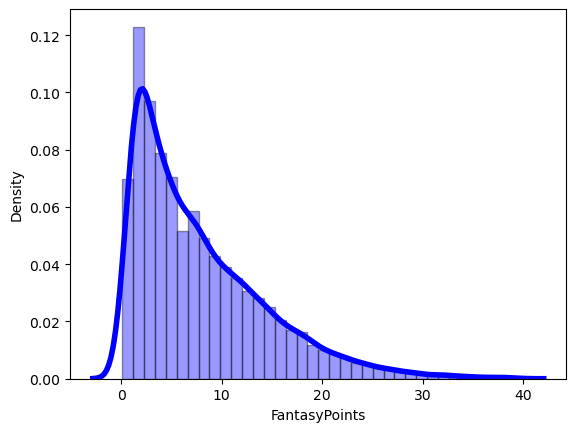

In [61]:
# Import the libraries
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib histogram
#plt.hist(df['FantasyPoints'], color = 'blue', edgecolor = 'black',
#         bins = int(180/5))

# seaborn histogram
sns.distplot(df['FantasyPoints'], hist=True, kde=True, 
             bins=int(180/5), color = 'blue',
             hist_kws={'edgecolor':'black'},
            kde_kws = {'linewidth':4})
# Add labels
##plt.title('Histogram of Fantasy Points')
#plt.xlabel('FantasyPoints')
#plt.ylabel('Count')

In [62]:

df = df.drop(columns = ['Unnamed: 0', #'Unnamed: 0.1',
#'player_wk_year',
'Player ',
'Fumbles FF','Fumbles FL','Fumbles FR','Fumbles Fmb',
'Fumbles TD','Fumbles Yds','Kick Returns Rt','Kick Returns TD',
'Kick Returns Y/Rt','Kick Returns Yds','Off. Snaps Num','Off. Snaps Pct',
'Punt Returns Ret','Punt Returns TD','Punt Returns Y/R','Punt Returns Yds',
'Receiving Ctch%','Receiving Rec','Receiving TD','Receiving Tgt',
'Receiving Y/R','Receiving Y/Tgt','Receiving Yds','Rushing Att',
'Rushing TD','Rushing Y/A','Rushing Yds','ST Snaps Num',
'ST Snaps Pct','Scoring 2PM','Scoring Pts','ScoringSfty',
'Scoring TD',
#'Rk',
'GS',
#'Year',
#'Status',
'Date',
'G#',
'Age',
'Tm',
'home_away',
'Result',
'Player  1 wks ago',

#'Status 1 wks ago',
'Date 1 wks ago',
'Week 1 wks ago',
'Tm 1 wks ago',
'home_away 1 wks ago',
'Opp 1 wks ago',
'Result 1 wks ago',
'player_wk_year 1 wks ago',
'Player  2 wks ago',
#'Status 2 wks ago',
'Date 2 wks ago',
'Week 2 wks ago',
#'Age 2 wks ago',
'Tm 2 wks ago',
'home_away 2 wks ago',
'Opp 2 wks ago',
'Result 2 wks ago',
'player_wk_year 2 wks ago',
'Player  3 wks ago',

#'Status 3 wks ago',
'Date 3 wks ago',
'Week 3 wks ago',
#'Age 3 wks ago',
'Tm 3 wks ago',
'home_away 3 wks ago',
'Opp 3 wks ago',
'Result 3 wks ago',
'player_wk_year 3 wks ago',
'Player  4 wks ago',
#'Status 4 wks ago',
'Date 4 wks ago',
'Week 4 wks ago',
#'Age 4 wks ago',
'Tm 4 wks ago',
'home_away 4 wks ago',
'Opp 4 wks ago',
'Result 4 wks ago',
'player_wk_year 4 wks ago',
'Player  5 wks ago',

#'Status 5 wks ago',
'Date 5 wks ago',
'Week 5 wks ago',
#'Age 5 wks ago',
'Tm 5 wks ago',
'home_away 5 wks ago',
'Opp 5 wks ago',
'Result 5 wks ago',
'player_wk_year 5 wks ago',
'Player  6 wks ago',
#'Status 6 wks ago',
'Date 6 wks ago',
'Week 6 wks ago',
#'Age 6 wks ago',
'Tm 6 wks ago',
'home_away 6 wks ago',
'Opp 6 wks ago',
'Result 6 wks ago',
'player_wk_year 6 wks ago',
'Player  7 wks ago',

#'Status 7 wks ago',
'Date 7 wks ago',
'Week 7 wks ago',
#'Age 7 wks ago',
'Tm 7 wks ago',
'home_away 7 wks ago',
'Opp 7 wks ago',
'Result 7 wks ago',
'player_wk_year 7 wks ago',
'Player  8 wks ago',

#'Status 8 wks ago',
'Date 8 wks ago',
'Week 8 wks ago',
#'Age 8 wks ago',
'Tm 8 wks ago',
'home_away 8 wks ago',
'Opp 8 wks ago',
'Result 8 wks ago',
'player_wk_year 8 wks ago',
'Player  9 wks ago',

#'Status 9 wks ago',
'Date 9 wks ago',
'Week 9 wks ago',
#'Age 9 wks ago',
'Tm 9 wks ago',
'home_away 9 wks ago',
'Opp 9 wks ago',
'Result 9 wks ago',
'player_wk_year 9 wks ago',
'Player  10 wks ago',

#'Status 10 wks ago',
'Date 10 wks ago',
'Week 10 wks ago',
#'Age 10 wks ago',
'Tm 10 wks ago',
'home_away 10 wks ago',
'Opp 10 wks ago',
'Result 10 wks ago',
'player_wk_year 10 wks ago',
'Player  11 wks ago',

#'Status 11 wks ago',
'Date 11 wks ago',
'Week 11 wks ago',
#'Age 11 wks ago',
'Tm 11 wks ago',
'home_away 11 wks ago',
'Opp 11 wks ago',
'Result 11 wks ago',
'player_wk_year 11 wks ago',
'Player  12 wks ago',

#'Status 12 wks ago',
'Date 12 wks ago',
'Week 12 wks ago',
#'Age 12 wks ago',
'Tm 12 wks ago',
'home_away 12 wks ago',
'Opp 12 wks ago',
'Result 12 wks ago',
'player_wk_year 12 wks ago',
'Player  13 wks ago',

#'Status 13 wks ago',
'Date 13 wks ago',
'Week 13 wks ago',
#'Age 13 wks ago',
'Tm 13 wks ago',
'home_away 13 wks ago',
'Opp 13 wks ago',
'Result 13 wks ago',
'player_wk_year 13 wks ago',
'Player  14 wks ago',

#'Status 14 wks ago',
'Date 14 wks ago',
'Week 14 wks ago',
#'Age 14 wks ago',
'Tm 14 wks ago',
'home_away 14 wks ago',
'Opp 14 wks ago',
'Result 14 wks ago',
'player_wk_year 14 wks ago',
'Player  15 wks ago',

#'Status 15 wks ago',
'Date 15 wks ago',
'Week 15 wks ago',
#'Age 15 wks ago',
'Tm 15 wks ago',
'home_away 15 wks ago',
'Opp 15 wks ago',
'Result 15 wks ago',
'player_wk_year 15 wks ago',
'Player  16 wks ago',
#'Status 16 wks ago',
'Date 16 wks ago',
'Week 16 wks ago',
#'Age 16 wks ago',
'Tm 16 wks ago',
'home_away 16 wks ago',
'Opp 16 wks ago',
'Result 16 wks ago',
'player_wk_year 16 wks ago',
'Player  17 wks ago',

#'Status 17 wks ago',
'Date 17 wks ago',
'Week 17 wks ago',
#'Age 17 wks ago',
'Tm 17 wks ago',
'home_away 17 wks ago',
'Opp 17 wks ago',
'Result 17 wks ago',
'player_wk_year 17 wks ago',
'Player  18 wks ago',
#'Status 18 wks ago',
'Date 18 wks ago',
'Week 18 wks ago',
#'Age 18 wks ago',
'Tm 18 wks ago',
'home_away 18 wks ago',
'Opp 18 wks ago',
'Result 18 wks ago',
'player_wk_year 18 wks ago',
'Player  19 wks ago',
#'Status 19 wks ago',
'Date 19 wks ago',
'Week 19 wks ago',
#'Age 19 wks ago',
'Tm 19 wks ago',
'home_away 19 wks ago',
'Opp 19 wks ago',
'Result 19 wks ago',
'player_wk_year 19 wks ago',
'Player  20 wks ago',
#'Status 20 wks ago',
'Date 20 wks ago',
'Week 20 wks ago',
#'Age 20 wks ago',
'Tm 20 wks ago',
'home_away 20 wks ago',
'Opp 20 wks ago',
'Result 20 wks ago',
'player_wk_year 20 wks ago',
'Player  21 wks ago',

#'Status 21 wks ago',
'Date 21 wks ago',
'Week 21 wks ago',
#'Age 21 wks ago',
'Tm 21 wks ago',
'home_away 21 wks ago',
'Opp 21 wks ago',
'Result 21 wks ago',
'player_wk_year 21 wks ago',
'Player  22 wks ago',

#'Status 22 wks ago',
'Date 22 wks ago',
'Week 22 wks ago',
#'Age 22 wks ago',
'Tm 22 wks ago',
'home_away 22 wks ago',
'Opp 22 wks ago',
'Result 22 wks ago',
'player_wk_year 22 wks ago',
'Player  23 wks ago',

#'Status 23 wks ago',
'Date 23 wks ago',
'Week 23 wks ago',
#'Age 23 wks ago',
'Tm 23 wks ago',
'home_away 23 wks ago',
'Opp 23 wks ago',
'Result 23 wks ago',
'player_wk_year 23 wks ago',
'Player  24 wks ago',

#'Status 24 wks ago',
'Date 24 wks ago',
'Week 24 wks ago',
#'Age 24 wks ago',
'Tm 24 wks ago',
'home_away 24 wks ago',
'Opp 24 wks ago',
'Result 24 wks ago',
'player_wk_year 24 wks ago',
'Player  25 wks ago',

#'Status 25 wks ago',
'Date 25 wks ago',
'Week 25 wks ago',
#'Age 25 wks ago',
'Tm 25 wks ago',
'home_away 25 wks ago',
'Opp 25 wks ago',
'Result 25 wks ago',
'player_wk_year 25 wks ago',
'Player  26 wks ago',
#'Status 26 wks ago',
'Date 26 wks ago',
'Week 26 wks ago',
#'Age 26 wks ago',
'Tm 26 wks ago',
'home_away 26 wks ago',
'Opp 26 wks ago',
'Result 26 wks ago',
'player_wk_year 26 wks ago',
'Player  27 wks ago',
#'Status 27 wks ago',
'Date 27 wks ago',
'Week 27 wks ago',
#'Age 27 wks ago',
'Tm 27 wks ago',
'home_away 27 wks ago',
'Opp 27 wks ago',
'Result 27 wks ago',
'player_wk_year 27 wks ago',
'Player  28 wks ago',
#'Status 28 wks ago',
'Date 28 wks ago',
'Week 28 wks ago',
#'Age 28 wks ago',
'Tm 28 wks ago',
'home_away 28 wks ago',
'Opp 28 wks ago',
'Result 28 wks ago',
'player_wk_year 28 wks ago',
'Player  29 wks ago',
#'Status 29 wks ago',
'Date 29 wks ago',
'Week 29 wks ago',
#'Age 29 wks ago',
'Tm 29 wks ago',
'home_away 29 wks ago',
'Opp 29 wks ago',
'Result 29 wks ago',
'player_wk_year 29 wks ago',
'Player  30 wks ago',
#'Status 30 wks ago',
'Date 30 wks ago',
'Week 30 wks ago',
#'Age 30 wks ago',
'Tm 30 wks ago',
'home_away 30 wks ago',
'Opp 30 wks ago',
'Result 30 wks ago',
'player_wk_year 30 wks ago',
'Player  31 wks ago',
#'Status 31 wks ago',
'Date 31 wks ago',
'Week 31 wks ago',
#'Age 31 wks ago',
'Tm 31 wks ago',
'home_away 31 wks ago',
'Opp 31 wks ago',
'Result 31 wks ago',
'player_wk_year 31 wks ago',
'Player  32 wks ago',
#'Status 32 wks ago',
'Date 32 wks ago',
'Week 32 wks ago',
#'Age 32 wks ago',
'Tm 32 wks ago',
'home_away 32 wks ago',
'Opp 32 wks ago',
'Result 32 wks ago',
'player_wk_year 32 wks ago',
'Player  33 wks ago',
#'Status 33 wks ago',
'Date 33 wks ago',
'Week 33 wks ago',
#'Age 33 wks ago',
'Tm 33 wks ago',
'home_away 33 wks ago',
'Opp 33 wks ago',
'Result 33 wks ago',
'player_wk_year 33 wks ago',
'Player  34 wks ago',
#'Status 34 wks ago',
'Date 34 wks ago',
'Week 34 wks ago',
#'Age 34 wks ago',
'Tm 34 wks ago',
'home_away 34 wks ago',
'Opp 34 wks ago',
'Result 34 wks ago',
'player_wk_year 34 wks ago',
'Player  35 wks ago',
#'Status 35 wks ago',
'Date 35 wks ago',
'Week 35 wks ago',
#'Age 35 wks ago',
'Tm 35 wks ago',
'home_away 35 wks ago',
'Opp 35 wks ago',
'Result 35 wks ago',
'player_wk_year 35 wks ago',
'opp wk year',
'Team',
'CITY',
'Week',
'Sack',
'FR',
'INT',
'DefTD',
'PA',
'PaYD',
'RuYd',
'Safety',
'KickTD',
'FPts',
'week_num',
'year',
'Opp',
'away flag',
'opp Team 1wks ago',
'opp CITY 1wks ago',
'opp Team 2wks ago',
'opp CITY 2wks ago',
'opp Team 3wks ago',
'opp CITY 3wks ago',
'opp Team 4wks ago',
'opp CITY 4wks ago',
'opp Team 5wks ago',
'opp CITY 5wks ago',
'opp Team 6wks ago',
'opp CITY 6wks ago',
'opp Team 7wks ago',
'opp CITY 7wks ago',
'opp Team 8wks ago',
'opp CITY 8wks ago',
'opp Team 9wks ago',
'opp CITY 9wks ago',
'opp Team 10wks ago',
'opp CITY 10wks ago',
'opp Team 11wks ago',
'opp CITY 11wks ago',
'opp Team 12wks ago',
'opp CITY 12wks ago',
'opp Team 13wks ago',
'opp CITY 13wks ago',
'opp Team 14wks ago',
'opp CITY 14wks ago',
'opp Team 15wks ago',
'opp CITY 15wks ago',
'opp Team 16wks ago',
'opp CITY 16wks ago',
'opp Team 17wks ago',
'opp CITY 17wks ago',
'opp Team 18wks ago',
'opp CITY 18wks ago',
'opp Team 19wks ago',
'opp CITY 19wks ago',
'opp Team 20wks ago',
'opp CITY 20wks ago',
'opp Team 21wks ago',
'opp CITY 21wks ago',
'opp Team 22wks ago',
'opp CITY 22wks ago',
'opp Team 23wks ago',
'opp CITY 23wks ago',
'opp Team 24wks ago',
'opp CITY 24wks ago',
'opp Team 25wks ago',
'opp CITY 25wks ago',
'opp Team 26wks ago',
'opp CITY 26wks ago',
'opp Team 27wks ago',
'opp CITY 27wks ago',
'opp Team 28wks ago',
'opp CITY 28wks ago',
'opp Team 29wks ago',
'opp CITY 29wks ago',
'opp Team 30wks ago',
'opp CITY 30wks ago',
'opp Team 31wks ago',
'opp CITY 31wks ago',
'opp Team 32wks ago',
'opp CITY 32wks ago',
'opp Team 33wks ago',
'opp CITY 33wks ago',
'opp Team 34wks ago',
'opp CITY 34wks ago',
'opp Team 35wks ago',
'opp CITY 35wks ago',
'team_wk_year',
'def matchup Opp 1wks ago',
'def matchup team_wk_year 1wks ago',
'def matchup Opp 2wks ago',
#'def matchup away flag 2wks ago',
'def matchup team_wk_year 2wks ago',
'def matchup Opp 3wks ago',
#'def matchup away flag 3wks ago',
'def matchup team_wk_year 3wks ago',
'def matchup Opp 4wks ago',
#'def matchup away flag 4wks ago',
'def matchup team_wk_year 4wks ago',
'def matchup Opp 5wks ago',
#'def matchup away flag 5wks ago',
'def matchup team_wk_year 5wks ago',
'def matchup Opp 6wks ago',
#'def matchup away flag 6wks ago',
'def matchup team_wk_year 6wks ago',
'def matchup Opp 7wks ago',
#'def matchup away flag 7wks ago',
'def matchup team_wk_year 7wks ago',
'def matchup Opp 8wks ago',
#'def matchup away flag 8wks ago',
'def matchup team_wk_year 8wks ago',
'def matchup Opp 9wks ago',
#'def matchup away flag 9wks ago',
'def matchup team_wk_year 9wks ago',
'def matchup Opp 10wks ago',
#'def matchup away flag 10wks ago',
'def matchup team_wk_year 10wks ago',
'def matchup Opp 11wks ago',
#'def matchup away flag 11wks ago',
'def matchup team_wk_year 11wks ago',
'def matchup Opp 12wks ago',
#'def matchup away flag 12wks ago',
'def matchup team_wk_year 12wks ago',
'def matchup Opp 13wks ago',
#'def matchup away flag 13wks ago',
'def matchup team_wk_year 13wks ago',
'def matchup Opp 14wks ago',
#'def matchup away flag 14wks ago',
'def matchup team_wk_year 14wks ago',
'def matchup Opp 15wks ago',
#'def matchup away flag 15wks ago',
'def matchup team_wk_year 15wks ago',
'def matchup Opp 16wks ago',
#'def matchup away flag 16wks ago',
'def matchup team_wk_year 16wks ago',
'def matchup Opp 17wks ago',
#'def matchup away flag 17wks ago',
'def matchup team_wk_year 17wks ago',
'def matchup Opp 18wks ago',
#'def matchup away flag 18wks ago',
'def matchup team_wk_year 18wks ago',
'def matchup Opp 19wks ago',
#'def matchup away flag 19wks ago',
'def matchup team_wk_year 19wks ago',
'def matchup Opp 20wks ago',
#'def matchup away flag 20wks ago',
'def matchup team_wk_year 20wks ago',
'def matchup Opp 21wks ago',
#'def matchup away flag 21wks ago',
'def matchup team_wk_year 21wks ago',
'def matchup Opp 22wks ago',
#'def matchup away flag 22wks ago',
'def matchup team_wk_year 22wks ago',
'def matchup Opp 23wks ago',
#'def matchup away flag 23wks ago',
'def matchup team_wk_year 23wks ago',
'def matchup Opp 24wks ago',
#'def matchup away flag 24wks ago',
'def matchup team_wk_year 24wks ago',
'def matchup Opp 25wks ago',
#'def matchup away flag 25wks ago',
'def matchup team_wk_year 25wks ago',
'def matchup Opp 26wks ago',
#'def matchup away flag 26wks ago',
'def matchup team_wk_year 26wks ago',
'def matchup Opp 27wks ago',
#'def matchup away flag 27wks ago',
'def matchup team_wk_year 27wks ago',
'def matchup Opp 28wks ago',
#'def matchup away flag 28wks ago',
'def matchup team_wk_year 28wks ago',
'def matchup Opp 29wks ago',
#'def matchup away flag 29wks ago',
'def matchup team_wk_year 29wks ago',
'def matchup Opp 30wks ago',
#'def matchup away flag 30wks ago',
'def matchup team_wk_year 30wks ago',
'def matchup Opp 31wks ago',
#'def matchup away flag 31wks ago',
'def matchup team_wk_year 31wks ago',
'def matchup Opp 32wks ago',
#'def matchup away flag 32wks ago',
'def matchup team_wk_year 32wks ago',
'def matchup Opp 33wks ago',
#'def matchup away flag 33wks ago',
'def matchup team_wk_year 33wks ago',
'def matchup Opp 34wks ago',
#'def matchup away flag 34wks ago',
'def matchup team_wk_year 34wks ago',
'def matchup Opp 35wks ago',
#'def matchup away flag 35wks ago',
'def matchup team_wk_year 35wks ago',
                       'opp_wk_year',
                        'opp opp_wk_year 1wks ago', 
                       'opp opp_wk_year 2wks ago', 
                       'opp opp_wk_year 3wks ago', 
                        'opp opp_wk_year 4wks ago', 
                        'opp opp_wk_year 5wks ago', 
                        'opp opp_wk_year 6wks ago',
                        'opp opp_wk_year 7wks ago', 
                        'opp opp_wk_year 8wks ago', 
                        'opp opp_wk_year 9wks ago',
                        'opp opp_wk_year 10wks ago',
                        'opp opp_wk_year 11wks ago',
                        'opp opp_wk_year 12wks ago',
                        'opp opp_wk_year 13wks ago',
                        'opp opp_wk_year 14wks ago',
                        'opp opp_wk_year 15wks ago',
                        'opp opp_wk_year 16wks ago',
                        'opp opp_wk_year 17wks ago', 
                        'opp opp_wk_year 18wks ago',
                        'opp opp_wk_year 19wks ago',
                        'opp opp_wk_year 20wks ago',
                        'opp opp_wk_year 21wks ago',
                        'opp opp_wk_year 22wks ago',
                        'opp opp_wk_year 23wks ago', 
                        'opp opp_wk_year 24wks ago', 
                        'opp opp_wk_year 25wks ago', 
                        'opp opp_wk_year 26wks ago', 
                        'opp opp_wk_year 27wks ago', 
                        'opp opp_wk_year 28wks ago', 
                        'opp opp_wk_year 29wks ago',
                        'opp opp_wk_year 30wks ago',
                        'opp opp_wk_year 31wks ago',
                        'opp opp_wk_year 32wks ago',
                        'opp opp_wk_year 33wks ago',
                        'opp opp_wk_year 34wks ago',
                       'opp opp_wk_year 35wks ago', 
                        'def matchup opp_wk_year 1wks ago',
                        'def matchup opp_wk_year 2wks ago',
                        'def matchup opp_wk_year 3wks ago',
                        'def matchup opp_wk_year 4wks ago', 
                        'def matchup opp_wk_year 5wks ago',
                        'def matchup opp_wk_year 6wks ago',
                        'def matchup opp_wk_year 7wks ago',
                        'def matchup opp_wk_year 8wks ago',
                        'def matchup opp_wk_year 9wks ago', 
                        'def matchup opp_wk_year 10wks ago',
                        'def matchup opp_wk_year 11wks ago',
                        'def matchup opp_wk_year 12wks ago', 
                        'def matchup opp_wk_year 13wks ago', 
                        'def matchup opp_wk_year 14wks ago',
                        'def matchup opp_wk_year 15wks ago', 
                        'def matchup opp_wk_year 16wks ago', 
                        'def matchup opp_wk_year 17wks ago', 
                        'def matchup opp_wk_year 18wks ago', 
                        'def matchup opp_wk_year 19wks ago', 
                        'def matchup opp_wk_year 20wks ago', 
                        'def matchup opp_wk_year 21wks ago',
                        'def matchup opp_wk_year 22wks ago',
                        'def matchup opp_wk_year 23wks ago',
                        'def matchup opp_wk_year 24wks ago', 
                        'def matchup opp_wk_year 25wks ago', 
                        'def matchup opp_wk_year 26wks ago', 
                       'def matchup opp_wk_year 27wks ago',
                        'def matchup opp_wk_year 28wks ago',
                        'def matchup opp_wk_year 29wks ago',
                        'def matchup opp_wk_year 30wks ago', 
                       'def matchup opp_wk_year 31wks ago', 
                        'def matchup opp_wk_year 32wks ago', 
                        'def matchup opp_wk_year 33wks ago', 
                        'def matchup opp_wk_year 34wks ago', 
                        'def matchup opp_wk_year 35wks ago'
                       
          ]

)

In [6]:
#df['Passing Cmp% 1 wks ago'] = df['Passing Cmp% 1 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 1 wks ago'] = df['Off. Snaps Pct 1 wks ago'].str.rstrip('%').astype('float') / 100.0

#df['Passing Cmp% 2 wks ago'] = df['Passing Cmp% 2 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 2 wks ago'] = df['Off. Snaps Pct 2 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 3 wks ago'] = df['Passing Cmp% 3 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 3 wks ago'] = df['Off. Snaps Pct 3 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 4 wks ago'] = df['Passing Cmp% 4 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 4 wks ago'] = df['Off. Snaps Pct 4 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 5 wks ago'] = df['Passing Cmp% 5 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 5 wks ago'] = df['Off. Snaps Pct 5 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 6 wks ago'] = df['Passing Cmp% 6 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 6 wks ago'] = df['Off. Snaps Pct 6 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 7 wks ago'] = df['Passing Cmp% 7 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 7 wks ago'] = df['Off. Snaps Pct 7 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 8 wks ago'] = df['Passing Cmp% 8 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 8 wks ago'] = df['Off. Snaps Pct 8 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 9 wks ago'] = df['Passing Cmp% 9 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 9 wks ago'] = df['Off. Snaps Pct 9 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 10 wks ago'] = df['Passing Cmp% 10 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 10 wks ago'] = df['Off. Snaps Pct 10 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 11 wks ago'] = df['Passing Cmp% 11 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 11 wks ago'] = df['Off. Snaps Pct 11 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 12 wks ago'] = df['Passing Cmp% 12 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 12 wks ago'] = df['Off. Snaps Pct 12 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 13 wks ago'] = df['Passing Cmp% 13 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 13 wks ago'] = df['Off. Snaps Pct 13 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 14 wks ago'] = df['Passing Cmp% 14 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 14 wks ago'] = df['Off. Snaps Pct 14 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 15 wks ago'] = df['Passing Cmp% 15 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 15 wks ago'] = df['Off. Snaps Pct 15 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 16 wks ago'] = df['Passing Cmp% 16 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 16 wks ago'] = df['Off. Snaps Pct 16 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 17 wks ago'] = df['Passing Cmp% 17 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 17 wks ago'] = df['Off. Snaps Pct 17 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 18 wks ago'] = df['Passing Cmp% 18 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 18 wks ago'] = df['Off. Snaps Pct 18 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 19 wks ago'] = df['Passing Cmp% 19 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 19 wks ago'] = df['Off. Snaps Pct 19 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 20 wks ago'] = df['Passing Cmp% 20 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 20 wks ago'] = df['Off. Snaps Pct 20 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 21 wks ago'] = df['Passing Cmp% 21 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 21 wks ago'] = df['Off. Snaps Pct 21 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 22 wks ago'] = df['Passing Cmp% 22 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 22 wks ago'] = df['Off. Snaps Pct 22 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 23 wks ago'] = df['Passing Cmp% 23 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 23 wks ago'] = df['Off. Snaps Pct 23 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 24 wks ago'] = df['Passing Cmp% 24 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 24 wks ago'] = df['Off. Snaps Pct 24 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 25 wks ago'] = df['Passing Cmp% 25 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 25 wks ago'] = df['Off. Snaps Pct 25 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 26 wks ago'] = df['Passing Cmp% 26 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 26 wks ago'] = df['Off. Snaps Pct 26 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 27 wks ago'] = df['Passing Cmp% 27 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 27 wks ago'] = df['Off. Snaps Pct 27 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 28 wks ago'] = df['Passing Cmp% 28 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 28 wks ago'] = df['Off. Snaps Pct 28 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 29 wks ago'] = df['Passing Cmp% 29 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 29 wks ago'] = df['Off. Snaps Pct 29 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 30 wks ago'] = df['Passing Cmp% 30 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 30 wks ago'] = df['Off. Snaps Pct 30 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 31 wks ago'] = df['Passing Cmp% 31 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 31 wks ago'] = df['Off. Snaps Pct 31 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 32 wks ago'] = df['Passing Cmp% 32 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 32 wks ago'] = df['Off. Snaps Pct 32 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 33 wks ago'] = df['Passing Cmp% 33 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 33 wks ago'] = df['Off. Snaps Pct 33 wks ago'].str.rstrip('%').astype('float') / 100.0

#df['Passing Cmp% 34 wks ago'] = df['Passing Cmp% 34 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 34 wks ago'] = df['Off. Snaps Pct 34 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 35 wks ago'] = df['Passing Cmp% 35 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 35 wks ago'] = df['Off. Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0

In [6]:
#df['ST Snaps Pct 1 wks ago'] = df['ST Snaps Pct 1 wks ago'].astype('float') / 100.0
#df['ST Snaps Pct 1 wks ago'] = df['ST Snaps Pct 1 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 2 wks ago'] = df['ST Snaps Pct 2 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 3 wks ago'] = df['ST Snaps Pct 3 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 4 wks ago'] = df['ST Snaps Pct 4 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 5 wks ago'] = df['ST Snaps Pct 5 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 6 wks ago'] = df['ST Snaps Pct 6 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 7 wks ago'] = df['ST Snaps Pct 7 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 8 wks ago'] = df['ST Snaps Pct 8 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 9 wks ago'] = df['ST Snaps Pct 9 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 10 wks ago'] = df['ST Snaps Pct 10 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 11 wks ago'] = df['ST Snaps Pct 11 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 12 wks ago'] = df['ST Snaps Pct 12 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 13 wks ago'] = df['ST Snaps Pct 13 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 14 wks ago'] = df['ST Snaps Pct 14 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 15 wks ago'] = df['ST Snaps Pct 15 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 16 wks ago'] = df['ST Snaps Pct 16 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 17 wks ago'] = df['ST Snaps Pct 17 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 18 wks ago'] = df['ST Snaps Pct 18 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 19 wks ago'] = df['ST Snaps Pct 19 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 20 wks ago'] = df['ST Snaps Pct 20 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 21 wks ago'] = df['ST Snaps Pct 21 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 22 wks ago'] = df['ST Snaps Pct 22 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 23 wks ago'] = df['ST Snaps Pct 23 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 24 wks ago'] = df['ST Snaps Pct 24 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 25 wks ago'] = df['ST Snaps Pct 25 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 26 wks ago'] = df['ST Snaps Pct 26 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 27 wks ago'] = df['ST Snaps Pct 27 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 28 wks ago'] = df['ST Snaps Pct 28 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 29 wks ago'] = df['ST Snaps Pct 29 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 30 wks ago'] = df['ST Snaps Pct 30 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 31 wks ago'] = df['ST Snaps Pct 31 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 32 wks ago'] = df['ST Snaps Pct 32 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 33 wks ago'] = df['ST Snaps Pct 33 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 34 wks ago'] = df['ST Snaps Pct 34 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 35 wks ago'] = df['ST Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0


In [63]:
df['sum Off. Snaps Pct 2wk trend'] = df['sum Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 2wk trend'] = df['avg Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 2wk trend'] = df['min Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 2wk trend'] = df['max Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 3wk trend'] = df['sum Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 3wk trend'] = df['avg Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 3wk trend'] = df['min Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 3wk trend'] = df['max Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 4wk trend'] = df['sum Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 4wk trend'] = df['avg Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 4wk trend'] = df['min Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 4wk trend'] = df['max Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 5wk trend'] = df['sum Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 5wk trend'] = df['avg Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 5wk trend'] = df['min Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 5wk trend'] = df['max Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 6wk trend'] = df['sum Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 6wk trend'] = df['avg Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 6wk trend'] = df['min Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 6wk trend'] = df['max Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 9wk trend'] = df['sum Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 9wk trend'] = df['avg Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 9wk trend'] = df['min Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 9wk trend'] = df['max Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 12wk trend'] = df['sum Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 12wk trend'] = df['avg Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 12wk trend'] = df['min Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 12wk trend'] = df['max Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 15wk trend'] = df['sum Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 15wk trend'] = df['avg Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 15wk trend'] = df['min Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 15wk trend'] = df['max Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 18wk trend'] = df['sum Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 18wk trend'] = df['avg Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 18wk trend'] = df['min Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 18wk trend'] = df['max Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 24wk trend'] = df['sum Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 24wk trend'] = df['avg Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 24wk trend'] = df['min Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 24wk trend'] = df['max Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df['sum Off. Snaps Pct 30wk trend'] = df['sum Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df['avg Off. Snaps Pct 30wk trend'] = df['avg Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df['min Off. Snaps Pct 30wk trend'] = df['min Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df['max Off. Snaps Pct 30wk trend'] = df['max Off. Snaps Pct 30wk trend'].astype('float') / 100.0

#df['sum Passing Cmp% 2wk trend'] = df['sum Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 2wk trend'] = df['avg Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 2wk trend'] = df['min Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 2wk trend'] = df['max Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 3wk trend'] = df['sum Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 3wk trend'] = df['avg Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 3wk trend'] = df['min Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 3wk trend'] = df['max Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 4wk trend'] = df['sum Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 4wk trend'] = df['avg Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 4wk trend'] = df['min Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 4wk trend'] = df['max Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 5wk trend'] = df['sum Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 5wk trend'] = df['avg Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 5wk trend'] = df['min Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 5wk trend'] = df['max Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 6wk trend'] = df['sum Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 6wk trend'] = df['avg Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 6wk trend'] = df['min Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 6wk trend'] = df['max Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 9wk trend'] = df['sum Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 9wk trend'] = df['avg Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 9wk trend'] = df['min Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 9wk trend'] = df['max Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 12wk trend'] = df['sum Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 12wk trend'] = df['avg Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 12wk trend'] = df['min Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 12wk trend'] = df['max Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 15wk trend'] = df['sum Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 15wk trend'] = df['avg Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 15wk trend'] = df['min Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 15wk trend'] = df['max Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 18wk trend'] = df['sum Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 18wk trend'] = df['avg Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 18wk trend'] = df['min Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 18wk trend'] = df['max Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 24wk trend'] = df['sum Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 24wk trend'] = df['avg Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 24wk trend'] = df['min Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 24wk trend'] = df['max Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 30wk trend'] = df['sum Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 30wk trend'] = df['avg Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 30wk trend'] = df['min Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 30wk trend'] = df['max Passing Cmp% 30wk trend'].astype('float') / 100.0


df['sum ST Snaps Pct 2wk trend'] = df['sum ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 2wk trend'] = df['avg ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 2wk trend'] = df['min ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 2wk trend'] = df['max ST Snaps Pct 2wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 3wk trend'] = df['sum ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 3wk trend'] = df['avg ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 3wk trend'] = df['min ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 3wk trend'] = df['max ST Snaps Pct 3wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 4wk trend'] = df['sum ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 4wk trend'] = df['avg ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 4wk trend'] = df['min ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 4wk trend'] = df['max ST Snaps Pct 4wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 5wk trend'] = df['sum ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 5wk trend'] = df['avg ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 5wk trend'] = df['min ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 5wk trend'] = df['max ST Snaps Pct 5wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 6wk trend'] = df['sum ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 6wk trend'] = df['avg ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 6wk trend'] = df['min ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 6wk trend'] = df['max ST Snaps Pct 6wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 9wk trend'] = df['sum ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 9wk trend'] = df['avg ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 9wk trend'] = df['min ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 9wk trend'] = df['max ST Snaps Pct 9wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 12wk trend'] = df['sum ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 12wk trend'] = df['avg ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 12wk trend'] = df['min ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 12wk trend'] = df['max ST Snaps Pct 12wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 15wk trend'] = df['sum ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 15wk trend'] = df['avg ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 15wk trend'] = df['min ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 15wk trend'] = df['max ST Snaps Pct 15wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 18wk trend'] = df['sum ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 18wk trend'] = df['avg ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 18wk trend'] = df['min ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 18wk trend'] = df['max ST Snaps Pct 18wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 24wk trend'] = df['sum ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 24wk trend'] = df['avg ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 24wk trend'] = df['min ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 24wk trend'] = df['max ST Snaps Pct 24wk trend'].astype('float') / 100.0
df['sum ST Snaps Pct 30wk trend'] = df['sum ST Snaps Pct 30wk trend'].astype('float') / 100.0
df['avg ST Snaps Pct 30wk trend'] = df['avg ST Snaps Pct 30wk trend'].astype('float') / 100.0
df['min ST Snaps Pct 30wk trend'] = df['min ST Snaps Pct 30wk trend'].astype('float') / 100.0
df['max ST Snaps Pct 30wk trend'] = df['max ST Snaps Pct 30wk trend'].astype('float') / 100.0

In [64]:
#Off. Snaps Pct 35 wks ago, Receiving Ctch% 35 wks ago, ST Snaps Pct 35 wks ago
df['Receiving Ctch% 35 wks ago'] = df['Receiving Ctch% 35 wks ago'].str.rstrip('%').astype('float') / 100.0
df['ST Snaps Pct 35 wks ago'] = df['ST Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0
df['Off. Snaps Pct 35 wks ago'] = df['Off. Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0


In [10]:
#df['Receiving Ctch% 1 wks ago'] = df['Receiving Ctch% 1 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 2 wks ago'] = df['Receiving Ctch% 2 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 3 wks ago'] = df['Receiving Ctch% 3 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 4 wks ago'] = df['Receiving Ctch% 4 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 5 wks ago'] = df['Receiving Ctch% 5 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 6 wks ago'] = df['Receiving Ctch% 6 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 7 wks ago'] = df['Receiving Ctch% 7 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 8 wks ago'] = df['Receiving Ctch% 8 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 9 wks ago'] = df['Receiving Ctch% 9 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 10 wks ago'] = df['Receiving Ctch% 10 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 11 wks ago'] = df['Receiving Ctch% 11 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 12 wks ago'] = df['Receiving Ctch% 12 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 13 wks ago'] = df['Receiving Ctch% 13 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 14 wks ago'] = df['Receiving Ctch% 14 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 15 wks ago'] = df['Receiving Ctch% 15 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 16 wks ago'] = df['Receiving Ctch% 16 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 17 wks ago'] = df['Receiving Ctch% 17 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 18 wks ago'] = df['Receiving Ctch% 18 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 19 wks ago'] = df['Receiving Ctch% 19 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 20 wks ago'] = df['Receiving Ctch% 20 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 21 wks ago'] = df['Receiving Ctch% 21 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 22 wks ago'] = df['Receiving Ctch% 22 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 23 wks ago'] = df['Receiving Ctch% 23 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 24 wks ago'] = df['Receiving Ctch% 24 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 25 wks ago'] = df['Receiving Ctch% 25 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 26 wks ago'] = df['Receiving Ctch% 26 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 27 wks ago'] = df['Receiving Ctch% 27 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 28 wks ago'] = df['Receiving Ctch% 28 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 29 wks ago'] = df['Receiving Ctch% 29 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 30 wks ago'] = df['Receiving Ctch% 30 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 31 wks ago'] = df['Receiving Ctch% 31 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 32 wks ago'] = df['Receiving Ctch% 32 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 33 wks ago'] = df['Receiving Ctch% 33 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 34 wks ago'] = df['Receiving Ctch% 34 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 35 wks ago'] = df['Receiving Ctch% 35 wks ago'].str.rstrip('%').astype('float') / 100.0


In [65]:
df = shuffle(df, random_state = 0)
#df_oob = df[df['Year'] == 2021]
#df = df[df['Year'] != 2021]
df = df.drop(columns = ['Year'])
#df_oob = df_oob.drop(columns = ['Year'])
#df =df[~df['player_wk_year'].str.contains('3 2022')]

#print(df_oob.shape, df.shape)

In [66]:
# Importing the libraries
#import pyspark.sql.functions as F
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import joblib
import shutil
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 300)

from sklearn.model_selection import GridSearchCV
#from imblearn.over_sampling import SMOTE
#from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from xgboost import plot_importance
import sklearn.metrics as sklmetrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn import metrics

from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
import optuna

In [67]:
# split data into X and y
X = df.drop(columns = ['FantasyPoints'])
#X = X.fillna(0)
Y = df[['FantasyPoints']]
Y = Y.fillna(0)
Y = Y.rename(columns = {'FantasyPoints':'y'})

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)


In [68]:
from sklearn.preprocessing import StandardScaler
#model = XGBClassifier()
scaler = StandardScaler()
#x_trainScaled = scaler.fit_transform(_Xtrain)
#model.fit(x_trainScaled, y_train)

In [69]:
X_train_id = X_train[['player_wk_year']]
X_train = X_train.drop(columns = 'player_wk_year')
X_train = X_train.fillna(0)
#X_train = scaler.fit_transform(X_train)

y_train = y_train.fillna(0)
#y_train  = scaler.fit_transform(y_train)

y_test = y_test.fillna(0)
#y_test = scaler.fit_transform(y_test)

X_test_id = X_test[['player_wk_year']]
X_test = X_test.drop(columns = 'player_wk_year')
X_test = X_test.fillna(0)
#X_test = scaler.fit_transform(X_test)

#X_oob = df_oob.drop(columns = ['FantasyPoints','player_wk_year'])
#X_oob = X_oob.fillna(0)
#X_oob = scaler.fit_transform(X_oob)

#y_oob = df_oob[['FantasyPoints']]
#y_oob = y_oob.fillna(0)
#y_oob = y_oob.rename(columns = {'FantasyPoints':'y'})


#oob_id = df_oob[['FantasyPoints','player_wk_year']]


In [70]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
 
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  12.867357


In [71]:
if X.shape[0] != Y.shape[0]:
  print("X and y rows are mismatched, check dataset again")

In [72]:
def objective(trial):
    #(data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
    dtrain = xg.DMatrix(X_train, label=y_train)
    dvalid = xg.DMatrix(X_test, label=y_test)

    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xg.train(param, dtrain)
    preds = bst.predict(dvalid)
    rmse = np.sqrt(MSE(y_test, preds))
    print("RMSE : % f" %(rmse))
    return rmse

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=30, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
        
#optuna.visualization.plot_optimization_history(study)
#optuna.visualization.plot_parallel_coordinate(study)
#optuna.visualization.plot_slice(study)
#optuna.visualization.plot_param_importances(study)
  
  
booster = trial.params['booster']
 
if (booster == 'gblinear'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample}
  
elif(booster == 'gbtree'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
  }
  
elif (booster == 'dart'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  sample_type = trial.params['sample_type']
  normalize_type = trial.params['normalize_type']
  rate_drop = trial.params['rate_drop']
  skip_drop = trial.params['skip_drop']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy,
      'sample_type':sample_type,
      'normalize_type':normalize_type,
      'rate_drop':rate_drop,
      'skip_drop':skip_drop
     # 'n_estimators': n_estimators
  }
  
 
#lambda_ = trial.params['lambda']
#alpha = trial.params['alpha']
#subsample = trial.params['subsample']
#colsample_bytree = trial.params['colsample_bytree']
#max_depth = trial.params['max_depth']
#min_child_weight = trial.params['min_child_weight']
#eta = trial.params['eta']
#gamma = trial.params['gamma']
#grow_policy = trial.params['grow_policy']
#n_estimators = trial.user_attrs['n_estimators']
  

#params = {
#      'booster': booster,
#      'lambda': lambda_,
#      'alpha': alpha,
#      'subsample': subsample,
#      'colsample_bytree': colsample_bytree,
   #   'max_depth': max_depth,
#      'min_child_weight': min_child_weight,
#      'eta': eta,
#      'gamma': gamma,
#      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
#}
  

cls = xgb.XGBRegressor(
      #random_state=RANDOMSTATE, 
      use_label_encoder=False,
      n_jobs=-1,
      **params
  )    

cls.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)
  

[I 2023-09-16 06:22:04,646] A new study created in memory with name: no-name-1d637d39-325e-4ae2-9320-f1ec200ef5ea
[I 2023-09-16 06:22:06,918] Trial 0 finished with value: 6.015949094095191 and parameters: {'booster': 'gblinear', 'lambda': 2.5381954767374106e-06, 'alpha': 0.0016054544632245725, 'subsample': 0.7499932554739972, 'colsample_bytree': 0.8295586927694745}. Best is trial 0 with value: 6.015949094095191.


RMSE :  6.015949


[I 2023-09-16 06:22:11,427] Trial 1 finished with value: 9.87326428901216 and parameters: {'booster': 'dart', 'lambda': 0.0010225359270164215, 'alpha': 2.2236574865561707e-05, 'subsample': 0.626955876896266, 'colsample_bytree': 0.23957674040601307, 'max_depth': 9, 'min_child_weight': 8, 'eta': 1.828614273553798e-07, 'gamma': 0.0040234129493537454, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 1.9929184249946525e-06, 'skip_drop': 1.7427342332876431e-06}. Best is trial 0 with value: 6.015949094095191.


RMSE :  9.873264


[I 2023-09-16 06:22:13,877] Trial 2 finished with value: 6.427772321693857 and parameters: {'booster': 'gblinear', 'lambda': 1.9554925845272622e-08, 'alpha': 0.005306367922179823, 'subsample': 0.5407592651337426, 'colsample_bytree': 0.7731679153746682}. Best is trial 0 with value: 6.015949094095191.


RMSE :  6.427772


[I 2023-09-16 06:22:16,865] Trial 3 finished with value: 7.01841581121218 and parameters: {'booster': 'gbtree', 'lambda': 5.488391459941295e-05, 'alpha': 4.5959866970130644e-08, 'subsample': 0.8092049870956206, 'colsample_bytree': 0.4629070356962725, 'max_depth': 3, 'min_child_weight': 5, 'eta': 0.07108186119351284, 'gamma': 8.114762398532312e-07, 'grow_policy': 'depthwise'}. Best is trial 0 with value: 6.015949094095191.


RMSE :  7.018416


[I 2023-09-16 06:22:19,596] Trial 4 finished with value: 9.872822720363942 and parameters: {'booster': 'gbtree', 'lambda': 2.776094681840458e-07, 'alpha': 0.24792197422808884, 'subsample': 0.8053886311036704, 'colsample_bytree': 0.2056645327809295, 'max_depth': 5, 'min_child_weight': 10, 'eta': 7.160262804623328e-06, 'gamma': 3.4605559721120014e-06, 'grow_policy': 'lossguide'}. Best is trial 0 with value: 6.015949094095191.


RMSE :  9.872823


[I 2023-09-16 06:22:21,941] Trial 5 finished with value: 6.5839785303389196 and parameters: {'booster': 'gblinear', 'lambda': 1.358773584117896e-08, 'alpha': 4.090388237530399e-05, 'subsample': 0.28004380916053395, 'colsample_bytree': 0.5089620160269417}. Best is trial 0 with value: 6.015949094095191.


RMSE :  6.583979


[I 2023-09-16 06:22:26,640] Trial 6 finished with value: 9.873194597011388 and parameters: {'booster': 'dart', 'lambda': 0.5577192037958351, 'alpha': 0.00014656784636437172, 'subsample': 0.5113118203069498, 'colsample_bytree': 0.5669783784696936, 'max_depth': 5, 'min_child_weight': 5, 'eta': 1.2948057305274272e-06, 'gamma': 2.5546594458935936e-05, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.12522118273421645, 'skip_drop': 0.008480987958228265}. Best is trial 0 with value: 6.015949094095191.


RMSE :  9.873195


[I 2023-09-16 06:22:29,032] Trial 7 finished with value: 6.306434696094529 and parameters: {'booster': 'gblinear', 'lambda': 6.35628402907342e-08, 'alpha': 3.150832477491984e-06, 'subsample': 0.7619376897133787, 'colsample_bytree': 0.5686299123484739}. Best is trial 0 with value: 6.015949094095191.


RMSE :  6.306435


[I 2023-09-16 06:22:31,515] Trial 8 finished with value: 5.948422980304805 and parameters: {'booster': 'gblinear', 'lambda': 0.012200414638360075, 'alpha': 2.765183781084009e-08, 'subsample': 0.5697991854277316, 'colsample_bytree': 0.8340592706105163}. Best is trial 8 with value: 5.948422980304805.


RMSE :  5.948423


[I 2023-09-16 06:22:34,064] Trial 9 finished with value: 5.9156583191498875 and parameters: {'booster': 'gblinear', 'lambda': 0.043930698059238375, 'alpha': 3.4568893611716624e-06, 'subsample': 0.34177280404573496, 'colsample_bytree': 0.2911700566481768}. Best is trial 9 with value: 5.9156583191498875.


RMSE :  5.915658


[I 2023-09-16 06:22:40,212] Trial 10 finished with value: 9.507017991973399 and parameters: {'booster': 'gbtree', 'lambda': 0.6781370597298461, 'alpha': 6.437375860967611e-07, 'subsample': 0.9835383437188887, 'colsample_bytree': 0.9966252488587589, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.006162764727657509, 'gamma': 0.5778062970021457, 'grow_policy': 'depthwise'}. Best is trial 9 with value: 5.9156583191498875.


RMSE :  9.507018


[I 2023-09-16 06:22:42,671] Trial 11 finished with value: 5.942579180176257 and parameters: {'booster': 'gblinear', 'lambda': 0.013037489913132813, 'alpha': 1.650789157280639e-08, 'subsample': 0.31644877566895313, 'colsample_bytree': 0.3579315142262623}. Best is trial 9 with value: 5.9156583191498875.


RMSE :  5.942579


[I 2023-09-16 06:22:45,028] Trial 12 finished with value: 5.940103469690428 and parameters: {'booster': 'gblinear', 'lambda': 0.014969636811723235, 'alpha': 1.5056959855568135e-08, 'subsample': 0.20582115024949274, 'colsample_bytree': 0.38244817923192725}. Best is trial 9 with value: 5.9156583191498875.


RMSE :  5.940103


[I 2023-09-16 06:22:47,438] Trial 13 finished with value: 5.9467395402910554 and parameters: {'booster': 'gblinear', 'lambda': 0.014246777498621443, 'alpha': 5.861404235826335e-07, 'subsample': 0.22326623429304673, 'colsample_bytree': 0.35672120089679493}. Best is trial 9 with value: 5.9156583191498875.


RMSE :  5.946740


[I 2023-09-16 06:22:49,928] Trial 14 finished with value: 6.257971819781875 and parameters: {'booster': 'gblinear', 'lambda': 0.0003982985762973168, 'alpha': 2.698638576192985e-07, 'subsample': 0.37109162870917173, 'colsample_bytree': 0.3990176727268349}. Best is trial 9 with value: 5.9156583191498875.


RMSE :  6.257972


[I 2023-09-16 06:22:54,450] Trial 15 finished with value: 9.873275171247151 and parameters: {'booster': 'dart', 'lambda': 0.059014073329907685, 'alpha': 1.0033908128502557e-08, 'subsample': 0.38783018987135276, 'colsample_bytree': 0.2771266977729198, 'max_depth': 7, 'min_child_weight': 2, 'eta': 1.1255027380938977e-08, 'gamma': 1.2881492302562315e-08, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 1.1422963953880169e-08, 'skip_drop': 1.2513875946800879e-08}. Best is trial 9 with value: 5.9156583191498875.


RMSE :  9.873275


[I 2023-09-16 06:22:56,980] Trial 16 finished with value: 6.038787813656325 and parameters: {'booster': 'gblinear', 'lambda': 0.001651559809266404, 'alpha': 2.6391672769704854e-06, 'subsample': 0.2041034111544311, 'colsample_bytree': 0.30870331637217374}. Best is trial 9 with value: 5.9156583191498875.


RMSE :  6.038788


[I 2023-09-16 06:22:59,626] Trial 17 finished with value: 5.898392168994581 and parameters: {'booster': 'gblinear', 'lambda': 0.11213945421813465, 'alpha': 1.1890198848077168e-07, 'subsample': 0.4186297339221555, 'colsample_bytree': 0.45150642505790495}. Best is trial 17 with value: 5.898392168994581.


RMSE :  5.898392


[I 2023-09-16 06:23:04,054] Trial 18 finished with value: 9.862063206104498 and parameters: {'booster': 'dart', 'lambda': 0.32288124797919443, 'alpha': 1.4105200478187854e-07, 'subsample': 0.41313829079437164, 'colsample_bytree': 0.46220344896264026, 'max_depth': 3, 'min_child_weight': 10, 'eta': 0.00017878665434974592, 'gamma': 0.004216418631617347, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'tree', 'rate_drop': 0.03680187551693491, 'skip_drop': 0.5637397766237179}. Best is trial 17 with value: 5.898392168994581.


RMSE :  9.862063


[I 2023-09-16 06:23:07,110] Trial 19 finished with value: 6.21972700077293 and parameters: {'booster': 'gbtree', 'lambda': 0.12113012907138107, 'alpha': 3.405772096197509e-06, 'subsample': 0.4478613120746855, 'colsample_bytree': 0.20228806430530866, 'max_depth': 7, 'min_child_weight': 8, 'eta': 0.34161007031764, 'gamma': 1.3919536508981778e-08, 'grow_policy': 'lossguide'}. Best is trial 17 with value: 5.898392168994581.


RMSE :  6.219727


[I 2023-09-16 06:23:09,673] Trial 20 finished with value: 5.90297910851019 and parameters: {'booster': 'gblinear', 'lambda': 0.0913735423068922, 'alpha': 9.913706147435875e-08, 'subsample': 0.3335410847031502, 'colsample_bytree': 0.3228961348061187}. Best is trial 17 with value: 5.898392168994581.


RMSE :  5.902979


[I 2023-09-16 06:23:12,180] Trial 21 finished with value: 5.8999026735250055 and parameters: {'booster': 'gblinear', 'lambda': 0.10354636208235504, 'alpha': 1.2801187471661143e-07, 'subsample': 0.33230474486570544, 'colsample_bytree': 0.2994970812249296}. Best is trial 17 with value: 5.898392168994581.


RMSE :  5.899903


[I 2023-09-16 06:23:14,598] Trial 22 finished with value: 5.879540426541426 and parameters: {'booster': 'gblinear', 'lambda': 0.6716518585580303, 'alpha': 9.445810235915754e-08, 'subsample': 0.2915217264265957, 'colsample_bytree': 0.43720098658489887}. Best is trial 22 with value: 5.879540426541426.


RMSE :  5.879540


[I 2023-09-16 06:23:16,952] Trial 23 finished with value: 5.881033408357457 and parameters: {'booster': 'gblinear', 'lambda': 0.8559734537117462, 'alpha': 1.1276649865558055e-07, 'subsample': 0.45090893738418636, 'colsample_bytree': 0.42996387929605695}. Best is trial 22 with value: 5.879540426541426.


RMSE :  5.881033


[I 2023-09-16 06:23:19,333] Trial 24 finished with value: 5.88296427676088 and parameters: {'booster': 'gblinear', 'lambda': 0.9686216396766973, 'alpha': 5.457727594615672e-08, 'subsample': 0.4619440048591099, 'colsample_bytree': 0.4478063067815317}. Best is trial 22 with value: 5.879540426541426.


RMSE :  5.882964


[I 2023-09-16 06:23:21,721] Trial 25 finished with value: 5.887412184096141 and parameters: {'booster': 'gblinear', 'lambda': 0.5303335293255065, 'alpha': 5.147097431206901e-07, 'subsample': 0.48074207611537734, 'colsample_bytree': 0.6422078036278932}. Best is trial 22 with value: 5.879540426541426.


RMSE :  5.887412


[I 2023-09-16 06:23:23,976] Trial 26 finished with value: 5.881448693494397 and parameters: {'booster': 'gblinear', 'lambda': 0.9988805882917148, 'alpha': 1.1199737568145134e-08, 'subsample': 0.4793012668740313, 'colsample_bytree': 0.4045538748044445}. Best is trial 22 with value: 5.879540426541426.


RMSE :  5.881449


[I 2023-09-16 06:23:26,259] Trial 27 finished with value: 5.880767304866482 and parameters: {'booster': 'gblinear', 'lambda': 0.8773967076305212, 'alpha': 1.1358281378826513e-08, 'subsample': 0.27795698630613097, 'colsample_bytree': 0.38725956597097516}. Best is trial 22 with value: 5.879540426541426.


RMSE :  5.880767


[I 2023-09-16 06:23:30,384] Trial 28 finished with value: 9.839966880065491 and parameters: {'booster': 'dart', 'lambda': 0.1726766891388789, 'alpha': 4.648060451750884e-08, 'subsample': 0.2727381266556447, 'colsample_bytree': 0.5254682697809677, 'max_depth': 3, 'min_child_weight': 4, 'eta': 0.0005340451434347336, 'gamma': 0.9525406408997278, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'forest', 'rate_drop': 0.0002962854544514543, 'skip_drop': 0.00033371535097739824}. Best is trial 22 with value: 5.879540426541426.


RMSE :  9.839967


[I 2023-09-16 06:23:33,709] Trial 29 finished with value: 11.200565669560314 and parameters: {'booster': 'gbtree', 'lambda': 8.950816383588936e-06, 'alpha': 6.85118292764203e-07, 'subsample': 0.27112755523140186, 'colsample_bytree': 0.4135928118907362, 'max_depth': 7, 'min_child_weight': 7, 'eta': 0.9625354540733808, 'gamma': 0.0005535937160983932, 'grow_policy': 'lossguide'}. Best is trial 22 with value: 5.879540426541426.


RMSE :  11.200566
Number of finished trials:  30
Best trial:
  Value: 5.879540426541426
  Params: 
    booster: gblinear
    lambda: 0.6716518585580303
    alpha: 9.445810235915754e-08
    subsample: 0.2915217264265957
    colsample_bytree: 0.43720098658489887
[0]	validation_0-rmse:5.90356	validation_1-rmse:6.05158
[1]	validation_0-rmse:5.76953	validation_1-rmse:5.95709
[2]	validation_0-rmse:5.70450	validation_1-rmse:5.91943
[3]	validation_0-rmse:5.66607	validation_1-rmse:5.90178
[4]	validation_0-rmse:5.64014	validation_1-rmse:5.89213
[5]	validation_0-rmse:5.62214	validation_1-rmse:5.88743
[6]	validation_0-rmse:5.60906	validation_1-rmse:5.88523
[7]	validation_0-rmse:5.59906	validation_1-rmse:5.88444
[8]	validation_0-rmse:5.59097	validation_1-rmse:5.88488
[9]	validation_0-rmse:5.58456	validation_1-rmse:5.88430
[10]	validation_0-rmse:5.57919	validation_1-rmse:5.88443
[11]	validation_0-rmse:5.57480	validation_1-rmse:5.88535
[12]	validation_0-rmse:5.57086	validation_1-rmse:5.88607
[13]	val

XGBRegressor(alpha=9.445810235915754e-08, base_score=None, booster='gblinear',
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, lambda=0.6716518585580303,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=-1,
             num_parallel_tree=None, ...)

In [73]:

imp_dict = cls.get_booster().get_score(importance_type='weight') #‘total_gain’ - the total gain across all splits the feature is used in.
imp_total_gain = pd.DataFrame(imp_dict.items(), columns=['variable', 'weight'])
imp_total_gain = imp_total_gain.sort_values(by = 'weight',ascending=False)
  

In [74]:
imp_total_gain.head()

,variable,weight
2997,sum Off. Snaps Num 3wk trend,0.144667
3541,sum Receiving Yds 9wk trend,0.142699
3537,sum Receiving Yds 6wk trend,0.132350
4116,max def matchup INT 9wk trend,0.123956
23,Off. Snaps Pct 1 wks ago,0.121614


In [75]:

z = {"features" :X_train.columns.to_list(),"feature_importances":cls.feature_importances_}
test=pd.DataFrame(z)
test = test.sort_values(by="feature_importances",ascending = False)


In [76]:
test.head(20)

,features,feature_importances
2997,sum Off. Snaps Num 3wk trend,0.029944
3541,sum Receiving Yds 9wk trend,0.029537
3537,sum Receiving Yds 6wk trend,0.027395
4116,max def matchup INT 9wk trend,0.025657
23,Off. Snaps Pct 1 wks ago,0.025173
3001,sum Off. Snaps Num 4wk trend,0.024960
3545,sum Receiving Yds 12wk trend,0.024142
2993,sum Off. Snaps Num 2wk trend,0.021963
3005,sum Off. Snaps Num 5wk trend,0.021818
1576,opp INT 26wks ago,0.019210


In [77]:

feat_imp = pd.merge(imp_total_gain, test,  how='inner', left_on=['variable'], right_on = ['features'])
feat_imp = feat_imp.head(100)
  

In [78]:
#train = pd.concat([X_train,y_train, X_train_id], axis=1)
X_train['Prob'] = cls.predict(X_train)
train = pd.concat([X_train,y_train, X_train_id], axis=1)


In [79]:
train[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('train_data_scored_qb.csv')

,y,Prob,player_wk_year
16823,25.6,19.912384,Michael Thomas 16 2019
81,37.7,19.200096,Davante Adams 16 2020
1844,28.6,18.510159,Antonio Brown 1 2016
16824,5.7,18.058334,Michael Thomas 17 2019
3630,22.1,17.945807,Brandin Cooks 4 2018
9972,14.4,17.913670,Cooper Kupp 3 2022
8664,17.0,17.892349,Justin Jefferson 14 2021
8684,2.0,17.890350,Justin Jefferson 17 2022
8680,15.1,17.800446,Justin Jefferson 13 2022
968,12.6,17.707800,Odell Beckham Jr. 2 2016


In [80]:
#test = pd.concat([X_test, y_test, X_test_id], axis = 1)
X_test['Prob'] = cls.predict(X_test)
test = pd.concat([X_test, y_test, X_test_id], axis = 1)


In [81]:
test[test['player_wk_year'].str.contains('2022')][['y','Prob','player_wk_year']].sort_values(by = 'Prob', ascending = False)

,y,Prob,player_wk_year
7547,23.8,17.641195,Tyreek Hill 9 2022
8685,5.8,17.557606,Justin Jefferson 18 2022
104,13.5,17.291683,Davante Adams 7 2022
8681,27.8,17.175570,Justin Jefferson 14 2022
7552,17.4,17.053968,Tyreek Hill 15 2022
8678,4.8,16.548820,Justin Jefferson 11 2022
2933,29.0,16.389341,Ja'Marr Chase 7 2022
8679,24.4,16.201857,Justin Jefferson 12 2022
111,8.6,16.190432,Davante Adams 14 2022
100,8.2,16.021421,Davante Adams 2 2022


In [82]:
test[['y','Prob','player_wk_year']][test['player_wk_year'].str.contains('1 2023')].sort_values(by='Prob', ascending= False)

,y,Prob,player_wk_year
4583,21.2,13.902082,Stefon Diggs 1 2023
11226,4.1,10.884028,Terry McLaurin 1 2023
409,11.2,10.750758,Keenan Allen 1 2023
2939,6.6,10.736304,Ja'Marr Chase 1 2023
18502,11.9,10.645144,Garrett Wilson 1 2023
11934,3.5,10.275490,D.J. Moore 1 2023
11341,12.2,10.074223,D.K. Metcalf 1 2023
12428,4.6,9.642215,K.J. Osborn 1 2023
7754,1.9,9.236518,Isaiah Hodgins 1 2023
18203,6.5,9.199960,Mike Williams 1 2023


In [83]:
train[['y','Prob','player_wk_year']][train['player_wk_year'].str.contains('1 2023')].sort_values(by='Prob', ascending= False)

,y,Prob,player_wk_year
8686,19.5,16.323931,Justin Jefferson 1 2023
10074,9.7,14.434047,CeeDee Lamb 1 2023
7556,39.0,14.371503,Tyreek Hill 1 2023
116,9.6,14.123650,Davante Adams 1 2023
1843,11.4,13.986959,A.J. Brown 1 2023
15465,14.2,13.969392,DeVonta Smith 1 2023
5242,15.6,13.388442,Mike Evans 1 2023
6058,7.6,13.297071,Chris Godwin 1 2023
15932,16.1,13.147692,Amon-Ra St. Brown 1 2023
11402,24.6,12.378962,Jakobi Meyers 1 2023


In [84]:
top_feat_list=feat_imp.variable.to_list()
top_feat_list.append('player_wk_year')

In [85]:
# split data into X and y
X = df.drop(columns = ['FantasyPoints'])
X = X[top_feat_list]
#X = X.fillna(0)
Y = df[['FantasyPoints']]
Y = Y.fillna(0)
Y = Y.rename(columns = {'FantasyPoints':'y'})

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=7)


In [86]:
from sklearn.preprocessing import StandardScaler
#model = XGBClassifier()
scaler = StandardScaler()
#x_trainScaled = scaler.fit_transform(_Xtrain)
#model.fit(x_trainScaled, y_train)

In [87]:
from sklearn.preprocessing import StandardScaler
#model = XGBClassifier()
scaler = StandardScaler()
#x_trainScaled = scaler.fit_transform(_Xtrain)
#model.fit(x_trainScaled, y_train)

In [88]:
# Necessary imports
import numpy as np
import pandas as pd
import xgboost as xg
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
 
# Train and test set are converted to DMatrix objects,
# as it is required by learning API.
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gblinear", "objective":"reg:linear"}
 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation
rmse = np.sqrt(MSE(y_test, pred))
print("RMSE : % f" %(rmse))

RMSE :  43.840305


In [89]:
def objective(trial):
    #(data, target) = sklearn.datasets.load_breast_cancer(return_X_y=True)
    #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)
    dtrain = xg.DMatrix(X_train, label=y_train)
    dvalid = xg.DMatrix(X_test, label=y_test)

    param = {
        "verbosity": 0,
        "objective": "reg:squarederror",
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xg.train(param, dtrain)
    preds = bst.predict(dvalid)
    rmse = np.sqrt(MSE(y_test, preds))
    print("RMSE : % f" %(rmse))
    return rmse

if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=30, timeout=600)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))
        
        
#optuna.visualization.plot_optimization_history(study)
#optuna.visualization.plot_parallel_coordinate(study)
#optuna.visualization.plot_slice(study)
#optuna.visualization.plot_param_importances(study)
  
  
booster = trial.params['booster']
 
if (booster == 'gblinear'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample}
  
elif(booster == 'gbtree'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
  }
  
elif (booster == 'dart'):
  lambda_ = trial.params['lambda']
  alpha = trial.params['alpha']
  subsample = trial.params['subsample']
  colsample_bytree = trial.params['colsample_bytree'] 
  max_depth = trial.params['max_depth']
  min_child_weight = trial.params['min_child_weight']
  eta = trial.params['eta']
  gamma = trial.params['gamma']
  grow_policy = trial.params['grow_policy']
  sample_type = trial.params['sample_type']
  normalize_type = trial.params['normalize_type']
  rate_drop = trial.params['rate_drop']
  skip_drop = trial.params['skip_drop']
  
  params = {
      'booster': booster,
      'lambda': lambda_,
      'alpha': alpha,
      'subsample': subsample,
      'colsample_bytree': colsample_bytree,
      'max_depth': max_depth,
      'min_child_weight': min_child_weight,
      'eta': eta,
      'gamma': gamma,
      'grow_policy': grow_policy,
      'sample_type':sample_type,
      'normalize_type':normalize_type,
      'rate_drop':rate_drop,
      'skip_drop':skip_drop
     # 'n_estimators': n_estimators
  }
  
 
#lambda_ = trial.params['lambda']
#alpha = trial.params['alpha']
#subsample = trial.params['subsample']
#colsample_bytree = trial.params['colsample_bytree']
#max_depth = trial.params['max_depth']
#min_child_weight = trial.params['min_child_weight']
#eta = trial.params['eta']
#gamma = trial.params['gamma']
#grow_policy = trial.params['grow_policy']
#n_estimators = trial.user_attrs['n_estimators']
  

#params = {
#      'booster': booster,
#      'lambda': lambda_,
#      'alpha': alpha,
#      'subsample': subsample,
#      'colsample_bytree': colsample_bytree,
   #   'max_depth': max_depth,
#      'min_child_weight': min_child_weight,
#      'eta': eta,
#      'gamma': gamma,
#      'grow_policy': grow_policy#,
     # 'n_estimators': n_estimators
#}
  

cls = xgb.XGBRegressor(
      #random_state=RANDOMSTATE, 
      use_label_encoder=False,
      n_jobs=-1,
      **params
  )    

cls.fit(
    X_train, 
    y_train, 
    eval_metric="rmse", 
    eval_set=[(X_train, y_train), (X_test, y_test)], 
    verbose=True, 
    early_stopping_rounds = 20)
  

[I 2023-09-16 06:23:42,172] A new study created in memory with name: no-name-bf31ff30-4adc-4c43-8f42-b155e47ddaf1
[I 2023-09-16 06:23:42,250] Trial 0 finished with value: 2657189.6685500126 and parameters: {'booster': 'gblinear', 'lambda': 1.7232074854051422e-06, 'alpha': 6.709173693748327e-05, 'subsample': 0.9415382844747575, 'colsample_bytree': 0.209735163319799}. Best is trial 0 with value: 2657189.6685500126.


RMSE :  2657189.668550


[I 2023-09-16 06:23:42,377] Trial 1 finished with value: 6.312360682475975 and parameters: {'booster': 'gbtree', 'lambda': 5.462700893729917e-08, 'alpha': 6.3223810875909625e-06, 'subsample': 0.318491037566349, 'colsample_bytree': 0.7465046494556837, 'max_depth': 7, 'min_child_weight': 3, 'eta': 0.3358389796047726, 'gamma': 0.1183658540996011, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 6.312360682475975.


RMSE :  6.312361


[I 2023-09-16 06:23:42,558] Trial 2 finished with value: 7.437663310296986 and parameters: {'booster': 'gbtree', 'lambda': 0.34209705851087124, 'alpha': 8.419938219204204e-08, 'subsample': 0.827594722625596, 'colsample_bytree': 0.7519502273754892, 'max_depth': 9, 'min_child_weight': 6, 'eta': 0.054528447637807405, 'gamma': 2.8042620235061006e-08, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 6.312360682475975.


RMSE :  7.437663


[I 2023-09-16 06:23:42,627] Trial 3 finished with value: 1453.5452783152307 and parameters: {'booster': 'gblinear', 'lambda': 0.32505382507732555, 'alpha': 1.0712533715499699e-08, 'subsample': 0.23979036300774084, 'colsample_bytree': 0.993424705543086}. Best is trial 1 with value: 6.312360682475975.
[I 2023-09-16 06:23:42,706] Trial 4 finished with value: 9.873261614616748 and parameters: {'booster': 'gbtree', 'lambda': 2.6242712179565213e-05, 'alpha': 3.7423140981506096e-05, 'subsample': 0.2244968146867489, 'colsample_bytree': 0.7601122641758946, 'max_depth': 3, 'min_child_weight': 8, 'eta': 2.263861563309551e-07, 'gamma': 3.627575773483695e-08, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 6.312360682475975.


RMSE :  1453.545278
RMSE :  9.873262


[I 2023-09-16 06:23:42,772] Trial 5 finished with value: 4.1557856321952584e+18 and parameters: {'booster': 'gblinear', 'lambda': 0.012465763828285828, 'alpha': 1.4932493916336928e-05, 'subsample': 0.43169413492572994, 'colsample_bytree': 0.3210843090626476}. Best is trial 1 with value: 6.312360682475975.


RMSE :  4155785632195258368.000000


[I 2023-09-16 06:23:42,864] Trial 6 finished with value: 9.873270723428194 and parameters: {'booster': 'gbtree', 'lambda': 0.785442491110981, 'alpha': 1.06913262251088e-05, 'subsample': 0.8344760311537611, 'colsample_bytree': 0.37237694786966113, 'max_depth': 5, 'min_child_weight': 2, 'eta': 8.173498504547017e-08, 'gamma': 2.1024746484974282e-07, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 6.312360682475975.


RMSE :  9.873271


[I 2023-09-16 06:23:43,005] Trial 7 finished with value: 9.873253793182467 and parameters: {'booster': 'dart', 'lambda': 0.0028558106444680955, 'alpha': 0.004788705460470975, 'subsample': 0.45244338910268267, 'colsample_bytree': 0.690265520178489, 'max_depth': 7, 'min_child_weight': 5, 'eta': 3.4781813721346873e-07, 'gamma': 1.5954647693345452e-06, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.32409167856051796, 'skip_drop': 0.00018240923679193493}. Best is trial 1 with value: 6.312360682475975.


RMSE :  9.873254


[I 2023-09-16 06:23:43,118] Trial 8 finished with value: 9.692339268801707 and parameters: {'booster': 'dart', 'lambda': 1.9573662225989235e-07, 'alpha': 0.0059864047912202584, 'subsample': 0.33668475474584697, 'colsample_bytree': 0.5750624334799352, 'max_depth': 5, 'min_child_weight': 5, 'eta': 0.0028969067949217377, 'gamma': 1.0853988208352342e-06, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 3.8856276659186695e-06, 'skip_drop': 0.00012074957438062369}. Best is trial 1 with value: 6.312360682475975.
[I 2023-09-16 06:23:43,179] Trial 9 finished with value: 2.745829739933868e+26 and parameters: {'booster': 'gblinear', 'lambda': 0.00010430234949264615, 'alpha': 0.0022666251992130627, 'subsample': 0.7642727394961366, 'colsample_bytree': 0.5619223831161908}. Best is trial 1 with value: 6.312360682475975.


RMSE :  9.692339
RMSE :  274582973993386792695365632.000000


[I 2023-09-16 06:23:43,410] Trial 10 finished with value: 7.087588895252104 and parameters: {'booster': 'gbtree', 'lambda': 2.486262741036882e-08, 'alpha': 0.5096204885861955, 'subsample': 0.5469155005251845, 'colsample_bytree': 0.9002119705398739, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.5279108439888917, 'gamma': 0.7429200304490927, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 6.312360682475975.


RMSE :  7.087589


[I 2023-09-16 06:23:43,655] Trial 11 finished with value: 6.637158811717457 and parameters: {'booster': 'gbtree', 'lambda': 1.4777180490224773e-08, 'alpha': 0.1379126165006645, 'subsample': 0.5947715322949265, 'colsample_bytree': 0.937358897445226, 'max_depth': 9, 'min_child_weight': 2, 'eta': 0.4420900671054597, 'gamma': 0.9276367723576208, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 6.312360682475975.
[I 2023-09-16 06:23:43,841] Trial 12 finished with value: 7.257174110595552 and parameters: {'booster': 'gbtree', 'lambda': 3.3451120041855774e-08, 'alpha': 0.22092769384673547, 'subsample': 0.6131484632835262, 'colsample_bytree': 0.9021507384546062, 'max_depth': 7, 'min_child_weight': 3, 'eta': 0.8624159281768428, 'gamma': 0.953051332385116, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 6.312360682475975.


RMSE :  6.637159
RMSE :  7.257174


[I 2023-09-16 06:23:44,076] Trial 13 finished with value: 9.749182745106296 and parameters: {'booster': 'gbtree', 'lambda': 1.2376191814681324e-08, 'alpha': 1.0733524539260467e-06, 'subsample': 0.6544121439295068, 'colsample_bytree': 0.8374738116086712, 'max_depth': 9, 'min_child_weight': 4, 'eta': 0.0019628993144179645, 'gamma': 0.014881890691060745, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 6.312360682475975.


RMSE :  9.749183


[I 2023-09-16 06:23:44,304] Trial 14 finished with value: 8.75680725674346 and parameters: {'booster': 'gbtree', 'lambda': 8.351284124598742e-07, 'alpha': 0.0006022179217316693, 'subsample': 0.48407625007708543, 'colsample_bytree': 0.9628676910762742, 'max_depth': 7, 'min_child_weight': 10, 'eta': 0.019842370708275436, 'gamma': 0.006183538815330488, 'grow_policy': 'depthwise'}. Best is trial 1 with value: 6.312360682475975.


RMSE :  8.756807


[I 2023-09-16 06:23:44,556] Trial 15 finished with value: 9.867850712571164 and parameters: {'booster': 'gbtree', 'lambda': 1.885442721470922e-07, 'alpha': 0.05492624562342271, 'subsample': 0.3208335119747606, 'colsample_bytree': 0.8460997533863467, 'max_depth': 9, 'min_child_weight': 3, 'eta': 8.45074304949408e-05, 'gamma': 0.01819892860148762, 'grow_policy': 'lossguide'}. Best is trial 1 with value: 6.312360682475975.


RMSE :  9.867851


[I 2023-09-16 06:23:44,761] Trial 16 finished with value: 6.607410986065854 and parameters: {'booster': 'dart', 'lambda': 3.619755604452583e-06, 'alpha': 0.00017953735323267823, 'subsample': 0.6502164449143907, 'colsample_bytree': 0.6427581660957495, 'max_depth': 7, 'min_child_weight': 2, 'eta': 0.688443872598626, 'gamma': 0.00027396973905632703, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.810293407743687e-08, 'skip_drop': 9.824081296156159e-08}. Best is trial 1 with value: 6.312360682475975.
[I 2023-09-16 06:23:44,944] Trial 17 finished with value: 7.8542109706084124 and parameters: {'booster': 'dart', 'lambda': 7.3334050957085205e-06, 'alpha': 0.000267353001575742, 'subsample': 0.7149260271470831, 'colsample_bytree': 0.6489187147668952, 'max_depth': 5, 'min_child_weight': 4, 'eta': 0.04155279424974986, 'gamma': 0.00010389915402451518, 'grow_policy': 'depthwise', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 2.009

RMSE :  6.607411
RMSE :  7.854211


[I 2023-09-16 06:23:45,146] Trial 18 finished with value: 9.863463758640522 and parameters: {'booster': 'dart', 'lambda': 2.033368768499527e-06, 'alpha': 3.037017230309167e-06, 'subsample': 0.37893455691937034, 'colsample_bytree': 0.49705506304780633, 'max_depth': 7, 'min_child_weight': 8, 'eta': 0.00015324870887132571, 'gamma': 0.0001401779957839146, 'grow_policy': 'lossguide', 'sample_type': 'weighted', 'normalize_type': 'tree', 'rate_drop': 1.0065646764351775e-08, 'skip_drop': 0.5339499043464797}. Best is trial 1 with value: 6.312360682475975.
[I 2023-09-16 06:23:45,321] Trial 19 finished with value: 6.061626750513489 and parameters: {'booster': 'dart', 'lambda': 1.949764637154677e-07, 'alpha': 0.00018455450692908806, 'subsample': 0.5204895669819589, 'colsample_bytree': 0.7039769550634206, 'max_depth': 3, 'min_child_weight': 3, 'eta': 0.7128042655554074, 'gamma': 0.0007958640557015181, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 2.0

RMSE :  9.863464
RMSE :  6.061627


[I 2023-09-16 06:23:45,503] Trial 20 finished with value: 7.1275975918818935 and parameters: {'booster': 'dart', 'lambda': 1.9772193609320037e-07, 'alpha': 1.143131147557469e-06, 'subsample': 0.5396503188012753, 'colsample_bytree': 0.7477218118589672, 'max_depth': 3, 'min_child_weight': 7, 'eta': 0.06648293069272186, 'gamma': 0.0021906420806147883, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.00014099852132614806, 'skip_drop': 1.2226599283868255e-08}. Best is trial 19 with value: 6.061626750513489.
[I 2023-09-16 06:23:45,689] Trial 21 finished with value: 6.0404366034988195 and parameters: {'booster': 'dart', 'lambda': 1.139120906577922e-07, 'alpha': 0.00014776500414261936, 'subsample': 0.5094101457784023, 'colsample_bytree': 0.66267913905948, 'max_depth': 5, 'min_child_weight': 3, 'eta': 0.48606505215199297, 'gamma': 0.0006587371187839243, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 

RMSE :  7.127598
RMSE :  6.040437


[I 2023-09-16 06:23:45,863] Trial 22 finished with value: 6.263690862274083 and parameters: {'booster': 'dart', 'lambda': 9.792672174378518e-08, 'alpha': 6.452946165539286e-05, 'subsample': 0.4783923021937214, 'colsample_bytree': 0.7025798046425995, 'max_depth': 3, 'min_child_weight': 4, 'eta': 0.9955146468541224, 'gamma': 1.1986993631088668e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 3.1950445957450077e-05, 'skip_drop': 4.071529398209251e-07}. Best is trial 21 with value: 6.0404366034988195.
[I 2023-09-16 06:23:46,035] Trial 23 finished with value: 6.255719085533926 and parameters: {'booster': 'dart', 'lambda': 6.431708702270354e-07, 'alpha': 5.7673045101377014e-05, 'subsample': 0.49640636160408863, 'colsample_bytree': 0.6737247990645047, 'max_depth': 3, 'min_child_weight': 4, 'eta': 0.12430763893809181, 'gamma': 1.4086218775015289e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop':

RMSE :  6.263691
RMSE :  6.255719


[I 2023-09-16 06:23:46,207] Trial 24 finished with value: 6.409832801712079 and parameters: {'booster': 'dart', 'lambda': 5.7962298207124e-07, 'alpha': 0.0005934735385812095, 'subsample': 0.5399347869121709, 'colsample_bytree': 0.5375708555646223, 'max_depth': 3, 'min_child_weight': 5, 'eta': 0.10945575407702508, 'gamma': 0.0004701729630429212, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.1289494862603232e-05, 'skip_drop': 9.713943940816827e-07}. Best is trial 21 with value: 6.0404366034988195.
[I 2023-09-16 06:23:46,397] Trial 25 finished with value: 9.25381647979062 and parameters: {'booster': 'dart', 'lambda': 5.342369413058224e-07, 'alpha': 2.9132382763257902e-05, 'subsample': 0.42395285942276534, 'colsample_bytree': 0.6219392618539915, 'max_depth': 5, 'min_child_weight': 3, 'eta': 0.010438706886493895, 'gamma': 3.528188829493156e-05, 'grow_policy': 'depthwise', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.

RMSE :  6.409833
RMSE :  9.253816


[I 2023-09-16 06:23:46,580] Trial 26 finished with value: 6.230485770313539 and parameters: {'booster': 'dart', 'lambda': 5.180464074667352e-08, 'alpha': 0.0001757133021740298, 'subsample': 0.5010531955413027, 'colsample_bytree': 0.8000737015734716, 'max_depth': 3, 'min_child_weight': 4, 'eta': 0.12860656429655687, 'gamma': 0.000687127096374035, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.1254253955103547e-06, 'skip_drop': 5.797728195714644e-06}. Best is trial 21 with value: 6.0404366034988195.
[I 2023-09-16 06:23:46,756] Trial 27 finished with value: 6.1995306071167375 and parameters: {'booster': 'dart', 'lambda': 1.26857917227093e-07, 'alpha': 0.00137296725626893, 'subsample': 0.5834230013295667, 'colsample_bytree': 0.8189037017339298, 'max_depth': 3, 'min_child_weight': 6, 'eta': 0.13167057020430278, 'gamma': 0.0009786516631408596, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 1.778

RMSE :  6.230486
RMSE :  6.199531


[I 2023-09-16 06:23:46,962] Trial 28 finished with value: 9.204399124629132 and parameters: {'booster': 'dart', 'lambda': 1.171464430339636e-08, 'alpha': 0.015000745107353903, 'subsample': 0.5993390029766285, 'colsample_bytree': 0.8126134752995557, 'max_depth': 5, 'min_child_weight': 6, 'eta': 0.011342639168758495, 'gamma': 0.0012002350414037392, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 5.191356992250197e-07, 'skip_drop': 1.2107833628515255e-08}. Best is trial 21 with value: 6.0404366034988195.
[I 2023-09-16 06:23:47,136] Trial 29 finished with value: 5.99704264011528 and parameters: {'booster': 'dart', 'lambda': 7.757228231718691e-06, 'alpha': 0.0007666652256763561, 'subsample': 0.4067373600723103, 'colsample_bytree': 0.6111863561146607, 'max_depth': 3, 'min_child_weight': 10, 'eta': 0.17386106928005027, 'gamma': 0.003595104645911549, 'grow_policy': 'lossguide', 'sample_type': 'uniform', 'normalize_type': 'forest', 'rate_drop': 0.0

RMSE :  9.204399
RMSE :  5.997043
Number of finished trials:  30
Best trial:
  Value: 5.99704264011528
  Params: 
    booster: dart
    lambda: 7.757228231718691e-06
    alpha: 0.0007666652256763561
    subsample: 0.4067373600723103
    colsample_bytree: 0.6111863561146607
    max_depth: 3
    min_child_weight: 10
    eta: 0.17386106928005027
    gamma: 0.003595104645911549
    grow_policy: lossguide
    sample_type: uniform
    normalize_type: forest
    rate_drop: 0.0007868789110360685
    skip_drop: 1.1030302342822297e-05
[0]	validation_0-rmse:8.69657	validation_1-rmse:8.81276
[1]	validation_0-rmse:7.89378	validation_1-rmse:8.01689
[2]	validation_0-rmse:7.29437	validation_1-rmse:7.42452
[3]	validation_0-rmse:6.83446	validation_1-rmse:6.96992
[4]	validation_0-rmse:6.49934	validation_1-rmse:6.64125
[5]	validation_0-rmse:6.25799	validation_1-rmse:6.40701
[6]	validation_0-rmse:6.09482	validation_1-rmse:6.24527
[7]	validation_0-rmse:5.97511	validation_1-rmse:6.13274
[8]	validation_0-rmse

XGBRegressor(alpha=0.0007666652256763561, base_score=None, booster='dart',
             callbacks=None, colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6111863561146607, early_stopping_rounds=None,
             enable_categorical=False, eta=0.17386106928005027,
             eval_metric=None, feature_types=None, gamma=0.003595104645911549,
             gpu_id=None, grow_policy='lossguide', importance_type=None,
             interaction_constraints=None, lambda=7.757228231718691e-06,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=10, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=-1, ...)

In [90]:

imp_dict2 = cls.get_booster().get_score(importance_type='weight') #‘total_gain’ - the total gain across all splits the feature is used in.
imp_total_gain2 = pd.DataFrame(imp_dict2.items(), columns=['variable', 'weight'])
imp_total_gain2 = imp_total_gain2.sort_values(by = 'weight',ascending=False)

z2 = {"features" :X_train.columns.to_list(),"feature_importances":cls.feature_importances_}
test2=pd.DataFrame(z2)
test2 = test2.sort_values(by="feature_importances",ascending = False)

feat_imp2 = pd.merge(imp_total_gain2, test2,  how='inner', left_on=['variable'], right_on = ['features'])
feat_imp2.head(100)
  

,variable,weight,features,feature_importances
0,Off. Snaps Pct 1 wks ago,11.0,Off. Snaps Pct 1 wks ago,0.013405
1,sum Receiving Yds 3wk trend,9.0,sum Receiving Yds 3wk trend,0.011066
2,sum Receiving Yds 24wk trend,9.0,sum Receiving Yds 24wk trend,0.007998
3,sum Receiving Yds 5wk trend,8.0,sum Receiving Yds 5wk trend,0.021835
4,Receiving Yds 32 wks ago,8.0,Receiving Yds 32 wks ago,0.006571
5,sum Rushing Yds 18wk trend,7.0,sum Rushing Yds 18wk trend,0.009184
6,max Receiving Yds 24wk trend,7.0,max Receiving Yds 24wk trend,0.008648
7,Receiving Yds 26 wks ago,7.0,Receiving Yds 26 wks ago,0.008593
8,sum Receiving Tgt 30wk trend,7.0,sum Receiving Tgt 30wk trend,0.005634
9,Receiving Yds 18 wks ago,6.0,Receiving Yds 18 wks ago,0.009493


In [1]:
#train = pd.concat([X_train,y_train, X_train_id], axis=1)
X_train['Prob'] = cls.predict(X_train)
train = pd.concat([X_train,y_train, X_train_id], axis=1)


NameError: name 'cls' is not defined

In [92]:
train[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('train_data_scored_qb.csv')

,y,Prob,player_wk_year
8669,34.9,19.472698,Justin Jefferson 1 2022
16818,21.4,19.134949,Michael Thomas 11 2019
8686,19.5,18.739971,Justin Jefferson 1 2023
97,25.1,18.334133,Davante Adams 17 2021
1852,27.4,18.206074,Antonio Brown 10 2016
984,24.4,18.183769,Odell Beckham Jr. 3 2017
9244,18.5,18.118143,Julio Jones 10 2016
9263,18.4,17.974880,Julio Jones 16 2017
92,27.0,17.964397,Davante Adams 11 2021
1870,20.1,17.758686,Antonio Brown 13 2017


In [93]:
#test = pd.concat([X_test, y_test, X_test_id], axis = 1)
X_test['Prob'] = cls.predict(X_test)
test = pd.concat([X_test, y_test, X_test_id], axis = 1)


In [94]:
test[['y','Prob','player_wk_year']].sort_values(by='Prob', ascending= False).head(50)#.to_csv('test_data_scored_qb.csv')

,y,Prob,player_wk_year
7528,9.7,19.550739,Tyreek Hill 7 2021
7533,3.2,19.079708,Tyreek Hill 13 2021
9246,14.8,18.990179,Julio Jones 13 2016
9272,21.6,18.650753,Julio Jones 9 2018
103,25.9,18.513062,Davante Adams 5 2022
9273,20.2,17.843201,Julio Jones 10 2018
9239,3.9,17.570465,Julio Jones 5 2016
1880,12.7,17.498648,Antonio Brown 9 2018
8077,12.0,17.419119,DeAndre Hopkins 6 2019
7551,16.1,17.380909,Tyreek Hill 14 2022


In [95]:
test[['y','Prob','player_wk_year']][test['player_wk_year'].str.contains('1 2023')]

,y,Prob,player_wk_year
13592,10.0,5.173318,Josh Reynolds 1 2023
842,5.0,4.874913,Rashod Bateman 1 2023
3701,3.2,9.487185,Brandin Cooks 1 2023
7754,1.9,7.241300,Isaiah Hodgins 1 2023
12331,15.2,8.748217,Chris Olave 1 2023
12837,1.7,9.759395,Donovan Peoples-Jones 1 2023
11624,2.7,4.122561,Jonathan Mingo 1 2023
17732,5.5,5.079392,Justin Watson 1 2023
409,11.2,11.796863,Keenan Allen 1 2023
12151,16.9,4.122561,Puka Nacua 1 2023


In [96]:
train[['y','Prob','player_wk_year']][train['player_wk_year'].str.contains('1 2023')]

,y,Prob,player_wk_year
13593,10.1,4.122561,Rashee Rice 1 2023
15772,5.3,8.289396,JuJu Smith-Schuster 1 2023
1332,5.7,4.190630,Braxton Berrios 1 2023
1551,21.4,6.665090,Kendrick Bourne 1 2023
17972,7.8,7.405461,Nick Westbrook-Ikhine 1 2023
8122,10.0,8.314257,DeAndre Hopkins 1 2023
5839,1.5,7.610749,Michael Gallup 1 2023
13376,2.5,6.801521,Kalif Raymond 1 2023
7197,2.8,4.154679,Deonte Harty 1 2023
16917,2.0,5.272883,Deven Thompkins 1 2023


In [106]:

df_curr_wk = pd.read_csv("2023wrweek2_final.csv")
df_curr_wk =df_curr_wk.fillna(0)

In [46]:
#df = df[df['player_wk_year'] != 'Noah Brown 1 2022']

In [107]:
df_curr_wk =df_curr_wk.replace({'Did Not Play': 0,
                'Inactive': 0,
                'Injured Reserve':0,
                'COVID-19 List': 0,
                'Exempt List': 0,
                'Did Not PlayDid Not Play':0,
                'Did Not Play0':0,
                'Did Not PlayDid Not PlayDid Not Play':0,
                'Did Not Play00': 0,
                '98%100%': 100})
df_curr_wk = df_curr_wk.fillna(0)

In [108]:

df_curr_wk = df_curr_wk.drop(columns = ['Unnamed: 0', #'Unnamed: 0.1',
#'player_wk_year',
'Player ',
'Fumbles FF','Fumbles FL','Fumbles FR','Fumbles Fmb',
'Fumbles TD','Fumbles Yds','Kick Returns Rt','Kick Returns TD',
'Kick Returns Y/Rt','Kick Returns Yds','Off. Snaps Num','Off. Snaps Pct',
'Punt Returns Ret','Punt Returns TD','Punt Returns Y/R','Punt Returns Yds',
'Receiving Ctch%','Receiving Rec','Receiving TD','Receiving Tgt',
'Receiving Y/R','Receiving Y/Tgt','Receiving Yds','Rushing Att',
'Rushing TD','Rushing Y/A','Rushing Yds','ST Snaps Num',
'ST Snaps Pct','Scoring 2PM','Scoring Pts','ScoringSfty',
'Scoring TD',
#'Rk',
'GS',
'Year',
#'Status',
'Date',
'G#',
'Age',
'Tm',
'home_away',
'Result',
'Player  1 wks ago',

#'Status 1 wks ago',
'Date 1 wks ago',
'Week 1 wks ago',
'Tm 1 wks ago',
'home_away 1 wks ago',
'Opp 1 wks ago',
'Result 1 wks ago',
'player_wk_year 1 wks ago',
'Player  2 wks ago',
#'Status 2 wks ago',
'Date 2 wks ago',
'Week 2 wks ago',
#'Age 2 wks ago',
'Tm 2 wks ago',
'home_away 2 wks ago',
'Opp 2 wks ago',
'Result 2 wks ago',
'player_wk_year 2 wks ago',
'Player  3 wks ago',

#'Status 3 wks ago',
'Date 3 wks ago',
'Week 3 wks ago',
#'Age 3 wks ago',
'Tm 3 wks ago',
'home_away 3 wks ago',
'Opp 3 wks ago',
'Result 3 wks ago',
'player_wk_year 3 wks ago',
'Player  4 wks ago',
#'Status 4 wks ago',
'Date 4 wks ago',
'Week 4 wks ago',
#'Age 4 wks ago',
'Tm 4 wks ago',
'home_away 4 wks ago',
'Opp 4 wks ago',
'Result 4 wks ago',
'player_wk_year 4 wks ago',
'Player  5 wks ago',

#'Status 5 wks ago',
'Date 5 wks ago',
'Week 5 wks ago',
#'Age 5 wks ago',
'Tm 5 wks ago',
'home_away 5 wks ago',
'Opp 5 wks ago',
'Result 5 wks ago',
'player_wk_year 5 wks ago',
'Player  6 wks ago',
#'Status 6 wks ago',
'Date 6 wks ago',
'Week 6 wks ago',
#'Age 6 wks ago',
'Tm 6 wks ago',
'home_away 6 wks ago',
'Opp 6 wks ago',
'Result 6 wks ago',
'player_wk_year 6 wks ago',
'Player  7 wks ago',

#'Status 7 wks ago',
'Date 7 wks ago',
'Week 7 wks ago',
#'Age 7 wks ago',
'Tm 7 wks ago',
'home_away 7 wks ago',
'Opp 7 wks ago',
'Result 7 wks ago',
'player_wk_year 7 wks ago',
'Player  8 wks ago',

#'Status 8 wks ago',
'Date 8 wks ago',
'Week 8 wks ago',
#'Age 8 wks ago',
'Tm 8 wks ago',
'home_away 8 wks ago',
'Opp 8 wks ago',
'Result 8 wks ago',
'player_wk_year 8 wks ago',
'Player  9 wks ago',

#'Status 9 wks ago',
'Date 9 wks ago',
'Week 9 wks ago',
#'Age 9 wks ago',
'Tm 9 wks ago',
'home_away 9 wks ago',
'Opp 9 wks ago',
'Result 9 wks ago',
'player_wk_year 9 wks ago',
'Player  10 wks ago',

#'Status 10 wks ago',
'Date 10 wks ago',
'Week 10 wks ago',
#'Age 10 wks ago',
'Tm 10 wks ago',
'home_away 10 wks ago',
'Opp 10 wks ago',
'Result 10 wks ago',
'player_wk_year 10 wks ago',
'Player  11 wks ago',

#'Status 11 wks ago',
'Date 11 wks ago',
'Week 11 wks ago',
#'Age 11 wks ago',
'Tm 11 wks ago',
'home_away 11 wks ago',
'Opp 11 wks ago',
'Result 11 wks ago',
'player_wk_year 11 wks ago',
'Player  12 wks ago',

#'Status 12 wks ago',
'Date 12 wks ago',
'Week 12 wks ago',
#'Age 12 wks ago',
'Tm 12 wks ago',
'home_away 12 wks ago',
'Opp 12 wks ago',
'Result 12 wks ago',
'player_wk_year 12 wks ago',
'Player  13 wks ago',

#'Status 13 wks ago',
'Date 13 wks ago',
'Week 13 wks ago',
#'Age 13 wks ago',
'Tm 13 wks ago',
'home_away 13 wks ago',
'Opp 13 wks ago',
'Result 13 wks ago',
'player_wk_year 13 wks ago',
'Player  14 wks ago',

#'Status 14 wks ago',
'Date 14 wks ago',
'Week 14 wks ago',
#'Age 14 wks ago',
'Tm 14 wks ago',
'home_away 14 wks ago',
'Opp 14 wks ago',
'Result 14 wks ago',
'player_wk_year 14 wks ago',
'Player  15 wks ago',

#'Status 15 wks ago',
'Date 15 wks ago',
'Week 15 wks ago',
#'Age 15 wks ago',
'Tm 15 wks ago',
'home_away 15 wks ago',
'Opp 15 wks ago',
'Result 15 wks ago',
'player_wk_year 15 wks ago',
'Player  16 wks ago',
#'Status 16 wks ago',
'Date 16 wks ago',
'Week 16 wks ago',
#'Age 16 wks ago',
'Tm 16 wks ago',
'home_away 16 wks ago',
'Opp 16 wks ago',
'Result 16 wks ago',
'player_wk_year 16 wks ago',
'Player  17 wks ago',

#'Status 17 wks ago',
'Date 17 wks ago',
'Week 17 wks ago',
#'Age 17 wks ago',
'Tm 17 wks ago',
'home_away 17 wks ago',
'Opp 17 wks ago',
'Result 17 wks ago',
'player_wk_year 17 wks ago',
'Player  18 wks ago',
#'Status 18 wks ago',
'Date 18 wks ago',
'Week 18 wks ago',
#'Age 18 wks ago',
'Tm 18 wks ago',
'home_away 18 wks ago',
'Opp 18 wks ago',
'Result 18 wks ago',
'player_wk_year 18 wks ago',
'Player  19 wks ago',
#'Status 19 wks ago',
'Date 19 wks ago',
'Week 19 wks ago',
#'Age 19 wks ago',
'Tm 19 wks ago',
'home_away 19 wks ago',
'Opp 19 wks ago',
'Result 19 wks ago',
'player_wk_year 19 wks ago',
'Player  20 wks ago',
#'Status 20 wks ago',
'Date 20 wks ago',
'Week 20 wks ago',
#'Age 20 wks ago',
'Tm 20 wks ago',
'home_away 20 wks ago',
'Opp 20 wks ago',
'Result 20 wks ago',
'player_wk_year 20 wks ago',
'Player  21 wks ago',

#'Status 21 wks ago',
'Date 21 wks ago',
'Week 21 wks ago',
#'Age 21 wks ago',
'Tm 21 wks ago',
'home_away 21 wks ago',
'Opp 21 wks ago',
'Result 21 wks ago',
'player_wk_year 21 wks ago',
'Player  22 wks ago',

#'Status 22 wks ago',
'Date 22 wks ago',
'Week 22 wks ago',
#'Age 22 wks ago',
'Tm 22 wks ago',
'home_away 22 wks ago',
'Opp 22 wks ago',
'Result 22 wks ago',
'player_wk_year 22 wks ago',
'Player  23 wks ago',

#'Status 23 wks ago',
'Date 23 wks ago',
'Week 23 wks ago',
#'Age 23 wks ago',
'Tm 23 wks ago',
'home_away 23 wks ago',
'Opp 23 wks ago',
'Result 23 wks ago',
'player_wk_year 23 wks ago',
'Player  24 wks ago',

#'Status 24 wks ago',
'Date 24 wks ago',
'Week 24 wks ago',
#'Age 24 wks ago',
'Tm 24 wks ago',
'home_away 24 wks ago',
'Opp 24 wks ago',
'Result 24 wks ago',
'player_wk_year 24 wks ago',
'Player  25 wks ago',

#'Status 25 wks ago',
'Date 25 wks ago',
'Week 25 wks ago',
#'Age 25 wks ago',
'Tm 25 wks ago',
'home_away 25 wks ago',
'Opp 25 wks ago',
'Result 25 wks ago',
'player_wk_year 25 wks ago',
'Player  26 wks ago',
#'Status 26 wks ago',
'Date 26 wks ago',
'Week 26 wks ago',
#'Age 26 wks ago',
'Tm 26 wks ago',
'home_away 26 wks ago',
'Opp 26 wks ago',
'Result 26 wks ago',
'player_wk_year 26 wks ago',
'Player  27 wks ago',
#'Status 27 wks ago',
'Date 27 wks ago',
'Week 27 wks ago',
#'Age 27 wks ago',
'Tm 27 wks ago',
'home_away 27 wks ago',
'Opp 27 wks ago',
'Result 27 wks ago',
'player_wk_year 27 wks ago',
'Player  28 wks ago',
#'Status 28 wks ago',
'Date 28 wks ago',
'Week 28 wks ago',
#'Age 28 wks ago',
'Tm 28 wks ago',
'home_away 28 wks ago',
'Opp 28 wks ago',
'Result 28 wks ago',
'player_wk_year 28 wks ago',
'Player  29 wks ago',
#'Status 29 wks ago',
'Date 29 wks ago',
'Week 29 wks ago',
#'Age 29 wks ago',
'Tm 29 wks ago',
'home_away 29 wks ago',
'Opp 29 wks ago',
'Result 29 wks ago',
'player_wk_year 29 wks ago',
'Player  30 wks ago',
#'Status 30 wks ago',
'Date 30 wks ago',
'Week 30 wks ago',
#'Age 30 wks ago',
'Tm 30 wks ago',
'home_away 30 wks ago',
'Opp 30 wks ago',
'Result 30 wks ago',
'player_wk_year 30 wks ago',
'Player  31 wks ago',
#'Status 31 wks ago',
'Date 31 wks ago',
'Week 31 wks ago',
#'Age 31 wks ago',
'Tm 31 wks ago',
'home_away 31 wks ago',
'Opp 31 wks ago',
'Result 31 wks ago',
'player_wk_year 31 wks ago',
'Player  32 wks ago',
#'Status 32 wks ago',
'Date 32 wks ago',
'Week 32 wks ago',
#'Age 32 wks ago',
'Tm 32 wks ago',
'home_away 32 wks ago',
'Opp 32 wks ago',
'Result 32 wks ago',
'player_wk_year 32 wks ago',
'Player  33 wks ago',
#'Status 33 wks ago',
'Date 33 wks ago',
'Week 33 wks ago',
#'Age 33 wks ago',
'Tm 33 wks ago',
'home_away 33 wks ago',
'Opp 33 wks ago',
'Result 33 wks ago',
'player_wk_year 33 wks ago',
'Player  34 wks ago',
#'Status 34 wks ago',
'Date 34 wks ago',
'Week 34 wks ago',
#'Age 34 wks ago',
'Tm 34 wks ago',
'home_away 34 wks ago',
'Opp 34 wks ago',
'Result 34 wks ago',
'player_wk_year 34 wks ago',
'Player  35 wks ago',
#'Status 35 wks ago',
'Date 35 wks ago',
'Week 35 wks ago',
#'Age 35 wks ago',
'Tm 35 wks ago',
'home_away 35 wks ago',
'Opp 35 wks ago',
'Result 35 wks ago',
'player_wk_year 35 wks ago',
'opp wk year',
'Team',
'CITY',
'Week',
'Sack',
'FR',
'INT',
'DefTD',
'PA',
'PaYD',
'RuYd',
'Safety',
'KickTD',
'FPts',
'week_num',
'year',
'Opp',
'away flag',
'opp Team 1wks ago',
'opp CITY 1wks ago',
'opp Team 2wks ago',
'opp CITY 2wks ago',
'opp Team 3wks ago',
'opp CITY 3wks ago',
'opp Team 4wks ago',
'opp CITY 4wks ago',
'opp Team 5wks ago',
'opp CITY 5wks ago',
'opp Team 6wks ago',
'opp CITY 6wks ago',
'opp Team 7wks ago',
'opp CITY 7wks ago',
'opp Team 8wks ago',
'opp CITY 8wks ago',
'opp Team 9wks ago',
'opp CITY 9wks ago',
'opp Team 10wks ago',
'opp CITY 10wks ago',
'opp Team 11wks ago',
'opp CITY 11wks ago',
'opp Team 12wks ago',
'opp CITY 12wks ago',
'opp Team 13wks ago',
'opp CITY 13wks ago',
'opp Team 14wks ago',
'opp CITY 14wks ago',
'opp Team 15wks ago',
'opp CITY 15wks ago',
'opp Team 16wks ago',
'opp CITY 16wks ago',
'opp Team 17wks ago',
'opp CITY 17wks ago',
'opp Team 18wks ago',
'opp CITY 18wks ago',
'opp Team 19wks ago',
'opp CITY 19wks ago',
'opp Team 20wks ago',
'opp CITY 20wks ago',
'opp Team 21wks ago',
'opp CITY 21wks ago',
'opp Team 22wks ago',
'opp CITY 22wks ago',
'opp Team 23wks ago',
'opp CITY 23wks ago',
'opp Team 24wks ago',
'opp CITY 24wks ago',
'opp Team 25wks ago',
'opp CITY 25wks ago',
'opp Team 26wks ago',
'opp CITY 26wks ago',
'opp Team 27wks ago',
'opp CITY 27wks ago',
'opp Team 28wks ago',
'opp CITY 28wks ago',
'opp Team 29wks ago',
'opp CITY 29wks ago',
'opp Team 30wks ago',
'opp CITY 30wks ago',
'opp Team 31wks ago',
'opp CITY 31wks ago',
'opp Team 32wks ago',
'opp CITY 32wks ago',
'opp Team 33wks ago',
'opp CITY 33wks ago',
'opp Team 34wks ago',
'opp CITY 34wks ago',
'opp Team 35wks ago',
'opp CITY 35wks ago',
#'team_wk_year',
'def matchup Opp 1wks ago',
'def matchup team_wk_year 1wks ago',
'def matchup Opp 2wks ago',
#'def matchup away flag 2wks ago',
'def matchup team_wk_year 2wks ago',
'def matchup Opp 3wks ago',
#'def matchup away flag 3wks ago',
'def matchup team_wk_year 3wks ago',
'def matchup Opp 4wks ago',
#'def matchup away flag 4wks ago',
'def matchup team_wk_year 4wks ago',
'def matchup Opp 5wks ago',
#'def matchup away flag 5wks ago',
'def matchup team_wk_year 5wks ago',
'def matchup Opp 6wks ago',
#'def matchup away flag 6wks ago',
'def matchup team_wk_year 6wks ago',
'def matchup Opp 7wks ago',
#'def matchup away flag 7wks ago',
'def matchup team_wk_year 7wks ago',
'def matchup Opp 8wks ago',
#'def matchup away flag 8wks ago',
'def matchup team_wk_year 8wks ago',
'def matchup Opp 9wks ago',
#'def matchup away flag 9wks ago',
'def matchup team_wk_year 9wks ago',
'def matchup Opp 10wks ago',
#'def matchup away flag 10wks ago',
'def matchup team_wk_year 10wks ago',
'def matchup Opp 11wks ago',
#'def matchup away flag 11wks ago',
'def matchup team_wk_year 11wks ago',
'def matchup Opp 12wks ago',
#'def matchup away flag 12wks ago',
'def matchup team_wk_year 12wks ago',
'def matchup Opp 13wks ago',
#'def matchup away flag 13wks ago',
'def matchup team_wk_year 13wks ago',
'def matchup Opp 14wks ago',
#'def matchup away flag 14wks ago',
'def matchup team_wk_year 14wks ago',
'def matchup Opp 15wks ago',
#'def matchup away flag 15wks ago',
'def matchup team_wk_year 15wks ago',
'def matchup Opp 16wks ago',
#'def matchup away flag 16wks ago',
'def matchup team_wk_year 16wks ago',
'def matchup Opp 17wks ago',
#'def matchup away flag 17wks ago',
'def matchup team_wk_year 17wks ago',
'def matchup Opp 18wks ago',
#'def matchup away flag 18wks ago',
'def matchup team_wk_year 18wks ago',
'def matchup Opp 19wks ago',
#'def matchup away flag 19wks ago',
'def matchup team_wk_year 19wks ago',
'def matchup Opp 20wks ago',
#'def matchup away flag 20wks ago',
'def matchup team_wk_year 20wks ago',
'def matchup Opp 21wks ago',
#'def matchup away flag 21wks ago',
'def matchup team_wk_year 21wks ago',
'def matchup Opp 22wks ago',
#'def matchup away flag 22wks ago',
'def matchup team_wk_year 22wks ago',
'def matchup Opp 23wks ago',
#'def matchup away flag 23wks ago',
'def matchup team_wk_year 23wks ago',
'def matchup Opp 24wks ago',
#'def matchup away flag 24wks ago',
'def matchup team_wk_year 24wks ago',
'def matchup Opp 25wks ago',
#'def matchup away flag 25wks ago',
'def matchup team_wk_year 25wks ago',
'def matchup Opp 26wks ago',
#'def matchup away flag 26wks ago',
'def matchup team_wk_year 26wks ago',
'def matchup Opp 27wks ago',
#'def matchup away flag 27wks ago',
'def matchup team_wk_year 27wks ago',
'def matchup Opp 28wks ago',
#'def matchup away flag 28wks ago',
'def matchup team_wk_year 28wks ago',
'def matchup Opp 29wks ago',
#'def matchup away flag 29wks ago',
'def matchup team_wk_year 29wks ago',
'def matchup Opp 30wks ago',
#'def matchup away flag 30wks ago',
'def matchup team_wk_year 30wks ago',
'def matchup Opp 31wks ago',
#'def matchup away flag 31wks ago',
'def matchup team_wk_year 31wks ago',
'def matchup Opp 32wks ago',
#'def matchup away flag 32wks ago',
'def matchup team_wk_year 32wks ago',
'def matchup Opp 33wks ago',
#'def matchup away flag 33wks ago',
'def matchup team_wk_year 33wks ago',
'def matchup Opp 34wks ago',
#'def matchup away flag 34wks ago',
'def matchup team_wk_year 34wks ago',
'def matchup Opp 35wks ago',
#'def matchup away flag 35wks ago',
'def matchup team_wk_year 35wks ago'
          ]

)

In [42]:
#df['Passing Cmp% 1 wks ago'] = df['Passing Cmp% 1 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 1 wks ago'] = df['Off. Snaps Pct 1 wks ago'].str.rstrip('%').astype('float') / 100.0

#df['Passing Cmp% 2 wks ago'] = df['Passing Cmp% 2 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 2 wks ago'] = df['Off. Snaps Pct 2 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 3 wks ago'] = df['Passing Cmp% 3 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 3 wks ago'] = df['Off. Snaps Pct 3 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 4 wks ago'] = df['Passing Cmp% 4 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 4 wks ago'] = df['Off. Snaps Pct 4 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 5 wks ago'] = df['Passing Cmp% 5 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 5 wks ago'] = df['Off. Snaps Pct 5 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 6 wks ago'] = df['Passing Cmp% 6 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 6 wks ago'] = df['Off. Snaps Pct 6 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 7 wks ago'] = df['Passing Cmp% 7 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 7 wks ago'] = df['Off. Snaps Pct 7 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 8 wks ago'] = df['Passing Cmp% 8 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 8 wks ago'] = df['Off. Snaps Pct 8 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 9 wks ago'] = df['Passing Cmp% 9 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 9 wks ago'] = df['Off. Snaps Pct 9 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 10 wks ago'] = df['Passing Cmp% 10 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 10 wks ago'] = df['Off. Snaps Pct 10 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 11 wks ago'] = df['Passing Cmp% 11 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 11 wks ago'] = df['Off. Snaps Pct 11 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 12 wks ago'] = df['Passing Cmp% 12 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 12 wks ago'] = df['Off. Snaps Pct 12 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 13 wks ago'] = df['Passing Cmp% 13 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 13 wks ago'] = df['Off. Snaps Pct 13 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 14 wks ago'] = df['Passing Cmp% 14 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 14 wks ago'] = df['Off. Snaps Pct 14 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 15 wks ago'] = df['Passing Cmp% 15 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 15 wks ago'] = df['Off. Snaps Pct 15 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 16 wks ago'] = df['Passing Cmp% 16 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 16 wks ago'] = df['Off. Snaps Pct 16 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 17 wks ago'] = df['Passing Cmp% 17 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 17 wks ago'] = df['Off. Snaps Pct 17 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 18 wks ago'] = df['Passing Cmp% 18 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 18 wks ago'] = df['Off. Snaps Pct 18 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 19 wks ago'] = df['Passing Cmp% 19 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 19 wks ago'] = df['Off. Snaps Pct 19 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 20 wks ago'] = df['Passing Cmp% 20 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 20 wks ago'] = df['Off. Snaps Pct 20 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 21 wks ago'] = df['Passing Cmp% 21 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 21 wks ago'] = df['Off. Snaps Pct 21 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 22 wks ago'] = df['Passing Cmp% 22 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 22 wks ago'] = df['Off. Snaps Pct 22 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 23 wks ago'] = df['Passing Cmp% 23 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 23 wks ago'] = df['Off. Snaps Pct 23 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 24 wks ago'] = df['Passing Cmp% 24 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 24 wks ago'] = df['Off. Snaps Pct 24 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 25 wks ago'] = df['Passing Cmp% 25 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 25 wks ago'] = df['Off. Snaps Pct 25 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 26 wks ago'] = df['Passing Cmp% 26 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 26 wks ago'] = df['Off. Snaps Pct 26 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 27 wks ago'] = df['Passing Cmp% 27 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 27 wks ago'] = df['Off. Snaps Pct 27 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 28 wks ago'] = df['Passing Cmp% 28 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 28 wks ago'] = df['Off. Snaps Pct 28 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 29 wks ago'] = df['Passing Cmp% 29 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 29 wks ago'] = df['Off. Snaps Pct 29 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 30 wks ago'] = df['Passing Cmp% 30 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 30 wks ago'] = df['Off. Snaps Pct 30 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 31 wks ago'] = df['Passing Cmp% 31 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 31 wks ago'] = df['Off. Snaps Pct 31 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 32 wks ago'] = df['Passing Cmp% 32 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 32 wks ago'] = df['Off. Snaps Pct 32 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 33 wks ago'] = df['Passing Cmp% 33 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 33 wks ago'] = df['Off. Snaps Pct 33 wks ago'].str.rstrip('%').astype('float') / 100.0

#df['Passing Cmp% 34 wks ago'] = df['Passing Cmp% 34 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 34 wks ago'] = df['Off. Snaps Pct 34 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Passing Cmp% 35 wks ago'] = df['Passing Cmp% 35 wks ago'].astype('float') / 100.0
#df['Off. Snaps Pct 35 wks ago'] = df['Off. Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0

In [44]:
#df['ST Snaps Pct 1 wks ago'] = df['ST Snaps Pct 1 wks ago'].astype('float') / 100.0
#df['ST Snaps Pct 1 wks ago'] = df['ST Snaps Pct 1 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 2 wks ago'] = df['ST Snaps Pct 2 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 3 wks ago'] = df['ST Snaps Pct 3 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 4 wks ago'] = df['ST Snaps Pct 4 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 5 wks ago'] = df['ST Snaps Pct 5 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 6 wks ago'] = df['ST Snaps Pct 6 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 7 wks ago'] = df['ST Snaps Pct 7 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 8 wks ago'] = df['ST Snaps Pct 8 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 9 wks ago'] = df['ST Snaps Pct 9 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 10 wks ago'] = df['ST Snaps Pct 10 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 11 wks ago'] = df['ST Snaps Pct 11 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 12 wks ago'] = df['ST Snaps Pct 12 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 13 wks ago'] = df['ST Snaps Pct 13 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 14 wks ago'] = df['ST Snaps Pct 14 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 15 wks ago'] = df['ST Snaps Pct 15 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 16 wks ago'] = df['ST Snaps Pct 16 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 17 wks ago'] = df['ST Snaps Pct 17 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 18 wks ago'] = df['ST Snaps Pct 18 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 19 wks ago'] = df['ST Snaps Pct 19 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 20 wks ago'] = df['ST Snaps Pct 20 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 21 wks ago'] = df['ST Snaps Pct 21 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 22 wks ago'] = df['ST Snaps Pct 22 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 23 wks ago'] = df['ST Snaps Pct 23 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 24 wks ago'] = df['ST Snaps Pct 24 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 25 wks ago'] = df['ST Snaps Pct 25 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 26 wks ago'] = df['ST Snaps Pct 26 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 27 wks ago'] = df['ST Snaps Pct 27 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 28 wks ago'] = df['ST Snaps Pct 28 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 29 wks ago'] = df['ST Snaps Pct 29 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 30 wks ago'] = df['ST Snaps Pct 30 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 31 wks ago'] = df['ST Snaps Pct 31 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 32 wks ago'] = df['ST Snaps Pct 32 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 33 wks ago'] = df['ST Snaps Pct 33 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 34 wks ago'] = df['ST Snaps Pct 34 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['ST Snaps Pct 35 wks ago'] = df['ST Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0


In [109]:
df_curr_wk['sum Off. Snaps Pct 2wk trend'] = df_curr_wk['sum Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 2wk trend'] = df_curr_wk['avg Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 2wk trend'] = df_curr_wk['min Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 2wk trend'] = df_curr_wk['max Off. Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 3wk trend'] = df_curr_wk['sum Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 3wk trend'] = df_curr_wk['avg Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 3wk trend'] = df_curr_wk['min Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 3wk trend'] = df_curr_wk['max Off. Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 4wk trend'] = df_curr_wk['sum Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 4wk trend'] = df_curr_wk['avg Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 4wk trend'] = df_curr_wk['min Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 4wk trend'] = df_curr_wk['max Off. Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 5wk trend'] = df_curr_wk['sum Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 5wk trend'] = df_curr_wk['avg Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 5wk trend'] = df_curr_wk['min Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 5wk trend'] = df_curr_wk['max Off. Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 6wk trend'] = df_curr_wk['sum Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 6wk trend'] = df_curr_wk['avg Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 6wk trend'] = df_curr_wk['min Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 6wk trend'] = df_curr_wk['max Off. Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 9wk trend'] = df_curr_wk['sum Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 9wk trend'] = df_curr_wk['avg Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 9wk trend'] = df_curr_wk['min Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 9wk trend'] = df_curr_wk['max Off. Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 12wk trend'] = df_curr_wk['sum Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 12wk trend'] = df_curr_wk['avg Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 12wk trend'] = df_curr_wk['min Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 12wk trend'] = df_curr_wk['max Off. Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 15wk trend'] = df_curr_wk['sum Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 15wk trend'] = df_curr_wk['avg Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 15wk trend'] = df_curr_wk['min Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 15wk trend'] = df_curr_wk['max Off. Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 18wk trend'] = df_curr_wk['sum Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 18wk trend'] = df_curr_wk['avg Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 18wk trend'] = df_curr_wk['min Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 18wk trend'] = df_curr_wk['max Off. Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 24wk trend'] = df_curr_wk['sum Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 24wk trend'] = df_curr_wk['avg Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 24wk trend'] = df_curr_wk['min Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 24wk trend'] = df_curr_wk['max Off. Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['sum Off. Snaps Pct 30wk trend'] = df_curr_wk['sum Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['avg Off. Snaps Pct 30wk trend'] = df_curr_wk['avg Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['min Off. Snaps Pct 30wk trend'] = df_curr_wk['min Off. Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['max Off. Snaps Pct 30wk trend'] = df_curr_wk['max Off. Snaps Pct 30wk trend'].astype('float') / 100.0

#df['sum Passing Cmp% 2wk trend'] = df['sum Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 2wk trend'] = df['avg Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 2wk trend'] = df['min Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 2wk trend'] = df['max Passing Cmp% 2wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 3wk trend'] = df['sum Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 3wk trend'] = df['avg Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 3wk trend'] = df['min Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 3wk trend'] = df['max Passing Cmp% 3wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 4wk trend'] = df['sum Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 4wk trend'] = df['avg Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 4wk trend'] = df['min Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 4wk trend'] = df['max Passing Cmp% 4wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 5wk trend'] = df['sum Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 5wk trend'] = df['avg Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 5wk trend'] = df['min Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 5wk trend'] = df['max Passing Cmp% 5wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 6wk trend'] = df['sum Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 6wk trend'] = df['avg Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 6wk trend'] = df['min Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 6wk trend'] = df['max Passing Cmp% 6wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 9wk trend'] = df['sum Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 9wk trend'] = df['avg Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 9wk trend'] = df['min Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 9wk trend'] = df['max Passing Cmp% 9wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 12wk trend'] = df['sum Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 12wk trend'] = df['avg Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 12wk trend'] = df['min Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 12wk trend'] = df['max Passing Cmp% 12wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 15wk trend'] = df['sum Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 15wk trend'] = df['avg Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 15wk trend'] = df['min Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 15wk trend'] = df['max Passing Cmp% 15wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 18wk trend'] = df['sum Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 18wk trend'] = df['avg Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 18wk trend'] = df['min Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 18wk trend'] = df['max Passing Cmp% 18wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 24wk trend'] = df['sum Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 24wk trend'] = df['avg Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 24wk trend'] = df['min Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 24wk trend'] = df['max Passing Cmp% 24wk trend'].astype('float') / 100.0
#df['sum Passing Cmp% 30wk trend'] = df['sum Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['avg Passing Cmp% 30wk trend'] = df['avg Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['min Passing Cmp% 30wk trend'] = df['min Passing Cmp% 30wk trend'].astype('float') / 100.0
#df['max Passing Cmp% 30wk trend'] = df['max Passing Cmp% 30wk trend'].astype('float') / 100.0


df_curr_wk['sum ST Snaps Pct 2wk trend'] = df_curr_wk['sum ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 2wk trend'] = df_curr_wk['avg ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 2wk trend'] = df_curr_wk['min ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 2wk trend'] = df_curr_wk['max ST Snaps Pct 2wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 3wk trend'] = df_curr_wk['sum ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 3wk trend'] = df_curr_wk['avg ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 3wk trend'] = df_curr_wk['min ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 3wk trend'] = df_curr_wk['max ST Snaps Pct 3wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 4wk trend'] = df_curr_wk['sum ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 4wk trend'] = df_curr_wk['avg ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 4wk trend'] = df_curr_wk['min ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 4wk trend'] = df_curr_wk['max ST Snaps Pct 4wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 5wk trend'] = df_curr_wk['sum ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 5wk trend'] = df_curr_wk['avg ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 5wk trend'] = df_curr_wk['min ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 5wk trend'] = df_curr_wk['max ST Snaps Pct 5wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 6wk trend'] = df_curr_wk['sum ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 6wk trend'] = df_curr_wk['avg ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 6wk trend'] = df_curr_wk['min ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 6wk trend'] = df_curr_wk['max ST Snaps Pct 6wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 9wk trend'] = df_curr_wk['sum ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 9wk trend'] = df_curr_wk['avg ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 9wk trend'] = df_curr_wk['min ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 9wk trend'] = df_curr_wk['max ST Snaps Pct 9wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 12wk trend'] = df_curr_wk['sum ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 12wk trend'] = df_curr_wk['avg ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 12wk trend'] = df_curr_wk['min ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 12wk trend'] = df_curr_wk['max ST Snaps Pct 12wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 15wk trend'] = df_curr_wk['sum ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 15wk trend'] = df_curr_wk['avg ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 15wk trend'] = df_curr_wk['min ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 15wk trend'] = df_curr_wk['max ST Snaps Pct 15wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 18wk trend'] = df_curr_wk['sum ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 18wk trend'] = df_curr_wk['avg ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 18wk trend'] = df_curr_wk['min ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 18wk trend'] = df_curr_wk['max ST Snaps Pct 18wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 24wk trend'] = df_curr_wk['sum ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 24wk trend'] = df_curr_wk['avg ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 24wk trend'] = df_curr_wk['min ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 24wk trend'] = df_curr_wk['max ST Snaps Pct 24wk trend'].astype('float') / 100.0
df_curr_wk['sum ST Snaps Pct 30wk trend'] = df_curr_wk['sum ST Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['avg ST Snaps Pct 30wk trend'] = df_curr_wk['avg ST Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['min ST Snaps Pct 30wk trend'] = df_curr_wk['min ST Snaps Pct 30wk trend'].astype('float') / 100.0
df_curr_wk['max ST Snaps Pct 30wk trend'] = df_curr_wk['max ST Snaps Pct 30wk trend'].astype('float') / 100.0

In [49]:
#df['Receiving Ctch% 1 wks ago'] = df['Receiving Ctch% 1 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 2 wks ago'] = df['Receiving Ctch% 2 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 3 wks ago'] = df['Receiving Ctch% 3 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 4 wks ago'] = df['Receiving Ctch% 4 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 5 wks ago'] = df['Receiving Ctch% 5 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 6 wks ago'] = df['Receiving Ctch% 6 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 7 wks ago'] = df['Receiving Ctch% 7 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 8 wks ago'] = df['Receiving Ctch% 8 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 9 wks ago'] = df['Receiving Ctch% 9 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 10 wks ago'] = df['Receiving Ctch% 10 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 11 wks ago'] = df['Receiving Ctch% 11 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 12 wks ago'] = df['Receiving Ctch% 12 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 13 wks ago'] = df['Receiving Ctch% 13 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 14 wks ago'] = df['Receiving Ctch% 14 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 15 wks ago'] = df['Receiving Ctch% 15 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 16 wks ago'] = df['Receiving Ctch% 16 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 17 wks ago'] = df['Receiving Ctch% 17 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 18 wks ago'] = df['Receiving Ctch% 18 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 19 wks ago'] = df['Receiving Ctch% 19 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 20 wks ago'] = df['Receiving Ctch% 20 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 21 wks ago'] = df['Receiving Ctch% 21 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 22 wks ago'] = df['Receiving Ctch% 22 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 23 wks ago'] = df['Receiving Ctch% 23 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 24 wks ago'] = df['Receiving Ctch% 24 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 25 wks ago'] = df['Receiving Ctch% 25 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 26 wks ago'] = df['Receiving Ctch% 26 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 27 wks ago'] = df['Receiving Ctch% 27 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 28 wks ago'] = df['Receiving Ctch% 28 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 29 wks ago'] = df['Receiving Ctch% 29 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 30 wks ago'] = df['Receiving Ctch% 30 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 31 wks ago'] = df['Receiving Ctch% 31 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 32 wks ago'] = df['Receiving Ctch% 32 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 33 wks ago'] = df['Receiving Ctch% 33 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 34 wks ago'] = df['Receiving Ctch% 34 wks ago'].str.rstrip('%').astype('float') / 100.0
#df['Receiving Ctch% 35 wks ago'] = df['Receiving Ctch% 35 wks ago'].str.rstrip('%').astype('float') / 100.0


In [110]:
#Off. Snaps Pct 35 wks ago, Receiving Ctch% 35 wks ago, ST Snaps Pct 35 wks ago
df_curr_wk['Receiving Ctch% 35 wks ago'] = df_curr_wk['Receiving Ctch% 35 wks ago'].str.rstrip('%').astype('float') / 100.0
df_curr_wk['Off. Snaps Pct 35 wks ago'] = df_curr_wk['Off. Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0
df_curr_wk['ST Snaps Pct 35 wks ago'] = df_curr_wk['ST Snaps Pct 35 wks ago'].str.rstrip('%').astype('float') / 100.0


In [111]:
df_wk1_id = df_curr_wk[['player_wk_year', 'team_wk_year']]

#df_wk1['sum def matchup Opp 2wk trend'] = 0
#df_wk1['min def matchup Opp 2wk trend'] = 0
#df_wk1['max def matchup Opp 2wk trend'] = 0
#df_wk1['sum def matchup Opp 3wk trend'] = 0
#df_wk1['min def matchup Opp 3wk trend'] = 0
#df_wk1['max def matchup Opp 3wk trend'] = 0
#df_wk1['sum def matchup Opp 4wk trend'] = 0
#df_wk1['min def matchup Opp 4wk trend'] = 0
#df_wk1['max def matchup Opp 4wk trend'] = 0
#sum def matchup Opp 5wk trend, min def matchup Opp 5wk trend, max def matchup Opp 5wk trend
#df_wk1['sum def matchup Opp 5wk trend'] = 0
#df_wk1['min def matchup Opp 5wk trend'] = 0
#df_wk1['max def matchup Opp 5wk trend'] = 0
#sum def matchup Opp 4wk trend, min def matchup Opp 4wk trend, max def matchup Opp 4wk trend

#df_wk1 = df_wk1.drop(columns = ['player_wk_year'])
df_wk1 = df_wk1.fillna(0)

In [53]:
#df_wk1['Fumbles FF 1 wks ago'] = df_wk1['Fumbles FF 1 wks ago'].astype('float')

In [112]:
df_wk1['Prob'] = cls.predict(df_wk1)
df_wk1 = pd.concat([df_wk1_id, df_wk1], axis = 1)


In [55]:
#df_wk1[['Prob','player_wk_year','team_wk_year']].drop_duplicates('player_wk_yr')

In [113]:
df_wk1[['Prob','player_wk_year','team_wk_year']].sort_values(by='Prob', ascending= False)#.to_csv('week18_scored_wr.csv')

,Prob,player_wk_year,team_wk_year
146,16.562950,Justin Jefferson 2 2023,PHI 2 2023
0,14.676126,Davante Adams 2 2023,ATL 2 2023
2,14.676126,Davante Adams 2 2023,BUF 2 2023
3,14.676126,Davante Adams 2 2023,BUF 2 2023
1,14.676126,Davante Adams 2 2023,ATL 2 2023
586,14.571840,Tyreek Hill 2 2023,JAX 2 2023
585,14.571840,Tyreek Hill 2 2023,JAX 2 2023
584,13.918846,Tyreek Hill 2 2023,NE 2 2023
583,13.918846,Tyreek Hill 2 2023,NE 2 2023
143,13.486915,Stefon Diggs 2 2023,PHI 2 2023
